## CREDIT- EDA Case Study
"""
we will develop a basic understanding of risk analytics in banking and financial services
and understand how data is used to minimize the risk of losing money while lending to customers.
using EDA to analyze the patterns present in the data.
Once we recieve a loan application, can decide if apporve or not based on data.
"""

## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#Reading the Data set
application_data=pd.read_csv("application_data.csv")
previous_application=pd.read_csv("previous_application.csv")

In [3]:
# To show all the rows and columns in dataset
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
application_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [6]:
#Checking the shape of the dataset
application_data.shape

(307511, 122)

In [7]:
previous_application.shape

(1670214, 37)

In [8]:
#looking at the percentage null values in the column
round(100*application_data.isnull().mean(),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

## Dropping high% of null columns in application data


In [11]:
# null values more then 19%
null_perc = application_data.isnull().mean() * 100
colum_more_then_19 = null_perc[null_perc > 19].index
colum_more_then_19



Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMEN

In [12]:
len(colum_more_then_19)

51

In [13]:
#droping columns having null values more then 19% in it
application_data.drop(labels=colum_more_then_19,axis=1,inplace=True)


In [14]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_

In [15]:
#shape after dropping of columns of null columns more then 19%
application_data.shape

(307511, 71)

## Dropping all flag columns as they are of no use in this case study 

In [17]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCI

In [18]:
application_data.drop(columns= ['FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','FLAG_OWN_CAR','FLAG_OWN_REALTY'],axis=1,inplace=True)

In [19]:
application_data.shape

(307511, 43)

In [20]:
# now checking the columns having low number of null values in percentage
100*application_data.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_L

In [21]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Dropping high% of null columns in Previous application data

In [23]:
previous_application.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [24]:
null_perc =previous_application.isnull().mean()*100
colum_more_then_20 = null_perc[null_perc > 20].index
colum_more_then_20

Index(['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [25]:
previous_application.drop(labels=colum_more_then_20,axis=1,inplace=True)

In [26]:
previous_application.shape

(1670214, 23)

## Now we will impute missing values in Application dataset

In [28]:
application_data.isnull().sum().sort_values(ascending=False)

AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
NAME_TYPE_SUITE                 1292
OBS_60_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
REG_REGION_NOT_LIVE_REGION         0
ORGANIZATION_TYPE                  0
LIVE_CITY_NOT_WORK_CITY            0
REG_CITY_NOT_WORK_CITY             0
REG_CITY_NOT_LIVE_CITY             0
LIVE_REGION_NOT_WORK_REGION        0
REG_REGION_NOT_WORK_REGION         0
SK_ID_CURR                         0
HOUR_APPR_PROCESS_START            0
NAME_FAMILY_STATUS                 0
NAME_CONTRACT_TYPE                 0
C

### handling missing values in EXT_SOURCE_2 column 

In [30]:
#Replacing null values with mean 
ext_2_mean=application_data.EXT_SOURCE_2.mean()

In [31]:
application_data.EXT_SOURCE_2.fillna(ext_2_mean,inplace=True)

In [32]:
application_data.EXT_SOURCE_2.isnull().sum()

0

### handling missing values in AMT_REQ_CREDIT_BUREAU_YEAR and rest AMT columns together

In [34]:
#Most frequent value is 0 so we will replace with mode
application_data.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: count, dtype: int64

### handling missing values in AMT_REQ_CREDIT_BUREAU_YEAR 

In [36]:
# imputing with mode for AMT_REQ_CREDIT_BUREAU_YEAR column
amt_year_mode=application_data.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0]
amt_year_mode

0.0

In [37]:
application_data.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(amt_year_mode,inplace=True)

In [38]:
application_data.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

### handling missing values in AMT_REQ_CREDIT_BUREAU_QRT 

In [40]:
amt_qrt_mode=application_data.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0]
amt_qrt_mode

0.0

In [41]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(amt_qrt_mode,inplace=True)

In [42]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

0

### handling missing values in AMT_REQ_CREDIT_BUREAU_MON

In [44]:
amt_mon_mode=application_data.AMT_REQ_CREDIT_BUREAU_MON.mode()[0]
application_data.AMT_REQ_CREDIT_BUREAU_MON.fillna(amt_mon_mode,inplace=True)
application_data.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

0

### handling missing values in AMT_REQ_CREDIT_BUREAU_WEEK

In [46]:
amt_weak_mode=application_data.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0]
application_data.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(amt_weak_mode,inplace=True)
application_data.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

0

### handling missing values in AMT_REQ_CREDIT_BUREAU_DAY

In [48]:
amt_day_mode=application_data.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0]
application_data.AMT_REQ_CREDIT_BUREAU_DAY.fillna(amt_day_mode,inplace=True)
application_data.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

0

### handling missing values in AMT_REQ_CREDIT_BUREAU_HOUR

In [50]:
amt_hour_mode=application_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0]
application_data.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(amt_hour_mode,inplace=True)
application_data.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

0

### handling missing values in CNT_SOCIAL_CIRCLE columns and making columns to numeric

In [52]:
selected_cols=application_data.loc[:,application_data.columns.str.contains("BUREAU|CNT")]

In [53]:
application_data[selected_cols.columns]=selected_cols.apply(pd.to_numeric,errors="coerce").fillna(0).astype(int)

### handling missing values for NAME_TYPE_SUITE and AMT_GOODS_PRICE

In [55]:
#Replace with the mode and mean respectively
application_data["NAME_TYPE_SUITE"].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [56]:
application_data["NAME_TYPE_SUITE"].mode()[0]

'Unaccompanied'

In [57]:
application_data["NAME_TYPE_SUITE"].fillna(value="Unaccompanied",inplace=True)

In [58]:
# we cant impute AMT_GOODS_PRICE with the mean
application_data["AMT_GOODS_PRICE"].mean()

538396.2074288895

In [59]:
application_data["AMT_GOODS_PRICE"].fillna(application_data["AMT_GOODS_PRICE"].mean(),inplace=True)
application_data.isna().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_

### handling missing values for AMT_ANNUITY column

In [61]:
#most of the data is under 50k
application_data.AMT_ANNUITY.value_counts()

AMT_ANNUITY
9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
11250.0     1459
26217.0     1453
20250.0     1345
12375.0     1339
31653.0     1269
26640.0     1236
22500.0     1234
16875.0     1213
36459.0     1191
33025.5      938
26446.5      916
22018.5      904
23773.5      875
25537.5      836
26316.0      829
31261.5      822
21906.0      800
7875.0       741
40320.0      703
21888.0      688
32602.5      687
15750.0      684
27000.0      681
19867.5      653
33750.0      652
21775.5      643
29970.0      643
30528.0      626
45000.0      570
14350.5      564
32895.0      564
14751.0      551
23494.5      540
42790.5      527
26086.5      507
29250.0      506
23931.0      501
31630.5      499
31522.5      495
24939.0      491
16456.5      490
19125.0      471
21109.5      466
13963.5      462
30078.0      450
28408.5      449
45333.0      441
46084.5      436
67500.0      431
16011.0      419
35937.0      418
24543.0      418
25321.5      417
24

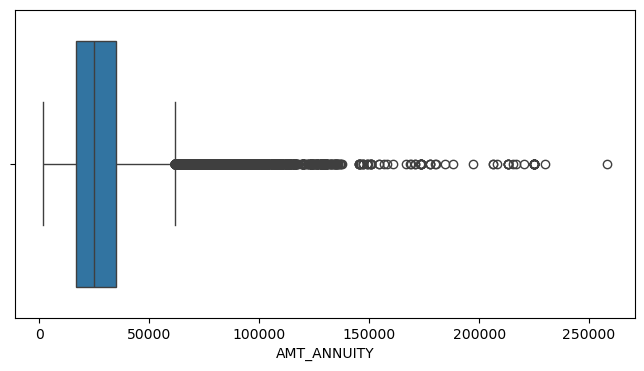

In [62]:
#we will plot box plot to see if there are outliers in it so it will be easy to impute with greater efficency
plt.figure(figsize=[8,4])
sns.boxplot(data=application_data,x="AMT_ANNUITY")
plt.show()

In [63]:
#there are outliers which are effecting so we will use median instead.
amt_annuity_median=application_data.AMT_ANNUITY.median()
application_data.AMT_ANNUITY.fillna(amt_annuity_median,inplace=True)
application_data.AMT_ANNUITY.isnull().sum()

0

### handling missing values for CNT_FAM_MEMBERS and DAYS_LAST_PHONE_CHANGE column

In [65]:
#checking the null values
application_data.loc[application_data.CNT_FAM_MEMBERS.isnull(),"CNT_FAM_MEMBERS"]

Series([], Name: CNT_FAM_MEMBERS, dtype: int32)

In [66]:
application_data.loc[application_data.DAYS_LAST_PHONE_CHANGE.isnull(),"DAYS_LAST_PHONE_CHANGE"]

15709   NaN
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [67]:
#checking null values again 
application_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATI

### Replacing or removing XNA Values wherever present 

In [69]:
for col in application_data.columns:
    if application_data[col].dtype=="object":
        print(application_data[col].value_counts())
        print("----"*20)

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
--------------------------------------------------------------------------------
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
--------------------------------------------------------------------------------
NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
--------------------------------------------------------------------------------
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64
-----------------------------------------------------------------

In [70]:
application_data.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [71]:
#There are lot of XNA values we will replace those with nan
application_data=application_data.drop(application_data.loc[application_data["ORGANIZATION_TYPE"]=="XNA"].index)

In [72]:
#Checking if XNA VALUES are removed
application_data["ORGANIZATION_TYPE"].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3     

In [73]:
# checking code gender column 
application_data.CODE_GENDER.value_counts()

CODE_GENDER
F      157177
M       94956
XNA         4
Name: count, dtype: int64

In [74]:
#There are only 4 values so we can replace with female(F)
application_data.CODE_GENDER= application_data.CODE_GENDER.replace(["XNA"], "F")

In [75]:
application_data.CODE_GENDER.value_counts()

CODE_GENDER
F    157181
M     94956
Name: count, dtype: int64

In [76]:
application_data.shape

(252137, 43)

In [77]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801       -9461           -637   
1  House / apartment                    0.003541      -16765          -1188   
2  House / apartment                    0.010032      -19046           -225   
3  House / apartment                    0.008019      -19005          -3039   
4  House / apartment                    0.028663      -19932          -3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            -3648.0            -2120                1                     2   
1            -1186.0             -291                2                     1   
2            -4260.0            -2531                1                     2   
3            -9833.0            -2437                2                     2   
4            -4311.0            -3458                1                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3      0.262949                      

### Some Columns are in float so we will convert it to integer

In [79]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252137 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   252137 non-null  int64  
 1   TARGET                       252137 non-null  int64  
 2   NAME_CONTRACT_TYPE           252137 non-null  object 
 3   CODE_GENDER                  252137 non-null  object 
 4   CNT_CHILDREN                 252137 non-null  int32  
 5   AMT_INCOME_TOTAL             252137 non-null  float64
 6   AMT_CREDIT                   252137 non-null  float64
 7   AMT_ANNUITY                  252137 non-null  float64
 8   AMT_GOODS_PRICE              252137 non-null  float64
 9   NAME_TYPE_SUITE              252137 non-null  object 
 10  NAME_INCOME_TYPE             252137 non-null  object 
 11  NAME_EDUCATION_TYPE          252137 non-null  object 
 12  NAME_FAMILY_STATUS           252137 non-null  object 
 13  NAME

In [80]:
application_data["DAYS_REGISTRATION"]=application_data["DAYS_REGISTRATION"].astype(int,errors="ignore")

In [81]:
application_data["CNT_FAM_MEMBERS"]=application_data["CNT_FAM_MEMBERS"].astype(int,errors="ignore")

In [82]:
application_data["DAYS_LAST_PHONE_CHANGE"]=application_data["DAYS_LAST_PHONE_CHANGE"].astype(int,errors="ignore")

In [83]:
#Now lets describe the dataset
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  252137.000000  252137.000000  252137.000000      2.521370e+05   
mean   278114.643103       0.086600       0.498515      1.759141e+05   
std    102815.635309       0.281248       0.763161      2.588516e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189035.000000       0.000000       0.000000      1.125000e+05   
50%    278064.000000       0.000000       0.000000      1.575000e+05   
75%    367165.000000       0.000000       1.000000      2.115000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  2.521370e+05  252137.000000     2.521370e+05   
mean   6.113985e+05   27812.186704     5.493945e+05   
std    4.065272e+05   14647.424282     3.730792e+05   
min    4.500000e+04    1980.000000     4.050000e+04   
25%    2.779695e+05   17073.000000     2.475000e+05   
50%    5.212800e+05   25834.500000     4.500000e+05   
75%    8.292240e+05   35617.500000     6.930000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               252137.000000  252137.000000  252137.000000   
mean                     0.020894  -14769.133174   -2384.169325   
std                      0.013874    3662.573769    2338.360162   
min                      0.000290  -25200.000000  -17912.000000   
25%                      0.010006  -17563.000000   -3175.000000   
50%                      0.018850  -14573.000000   -1648.000000   
75%                      0.028663  -11775.000000    -767.000000   
max                      0.072508   -7489.000000       0.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count      252137.000000    252137.000000    252137.000000   
mean        -4635.430849     -2800.639724         2.252506   
std          3252.169156      1515.360629         0.942134   
min        -22928.000000     -7197.000000         0.000000   
25%         -6952.000000     -4177.000000         2.000000   
50%         -4265.000000     -2886.000000         2.000000   
75%         -1845.000000     -1487.000000         3.000000   
max             0.000000         0.000000        20.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count         252137.000000                252137.000000   
mean               2.044615                     2.023333   
std                0.512384                     0.506422   
min                1.000000                     1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            252137.000000               252137.000000   
mean                 12.203302                    0.017241   
std                   3.299799                    0.130167   
min                   0.000000                    0.000000   
25%                  10.000000                    0.000000   
50%                  12.000000                    0.000000   
75%                  15.000000                    0.000000   
max                  23.000000                    1.000000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count               252137.000000                252137.000000   
mean                     0.061919                     0.049588   
std                      0.241008                     0.217093   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000   
75%                      0.000000                     0.000000   
max                      1.000000                     1.000000   

       

In [84]:
#Now days birth we will convert it to year for better understanding
application_data.DAYS_BIRTH=(application_data.DAYS_BIRTH/365).astype(int)

In [85]:
#seeing head of dataset
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801         -25           -637   
1  House / apartment                    0.003541         -45          -1188   
2  House / apartment                    0.010032         -52           -225   
3  House / apartment                    0.008019         -52          -3039   
4  House / apartment                    0.028663         -54          -3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0              -3648            -2120                1                     2   
1              -1186             -291                2                     1   
2              -4260            -2531                1                     2   
3              -9833            -2437                2                     2   
4              -4311            -3458                1                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3      0.262949                      

### Binning we will do for continues variables in DAYS_BIRTH ,AMT_INCOME_TOTAL 

##### We will create new binned column from DAYS_BIRTH column

In [88]:
application_data["Age_Category"]=pd.cut(application_data["DAYS_BIRTH"],bins=[18,25,40,60,100],labels=["Young","Middle_Age","Adult","Senior_Citezen"])
100*application_data["Age_Category"].value_counts(normalize=True)

Age_Category
Young            NaN
Middle_Age       NaN
Adult            NaN
Senior_Citezen   NaN
Name: proportion, dtype: float64

##### We will create new binned column from AMT_INCOME_TOTAL column

In [90]:
application_data["AMT_INCOME_TOTAL"].nunique()

2266

In [91]:
application_data.shape

(252137, 44)

In [92]:
pd.options.display.float_format="{:,.2f}".format

In [93]:
application_data["AMT_INCOME_TOTAL"].describe()

count       252,137.00
mean        175,914.07
std         258,851.59
min          25,650.00
25%         112,500.00
50%         157,500.00
75%         211,500.00
max     117,000,000.00
Name: AMT_INCOME_TOTAL, dtype: float64

<Axes: >

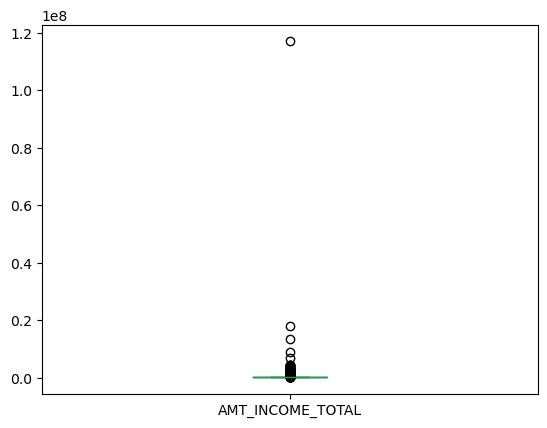

In [94]:
application_data["AMT_INCOME_TOTAL"].plot.box()

In [95]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0        202,500.00   406,597.50    24,700.50       351,000.00   
1        270,000.00 1,293,502.50    35,698.50     1,129,500.00   
2         67,500.00   135,000.00     6,750.00       135,000.00   
3        135,000.00   312,682.50    29,686.50       297,000.00   
4        121,500.00   513,000.00    21,865.50       513,000.00   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                        0.02   
1               Married  House / apartment                        0.00   
2  Single / not married  House / apartment                        0.01   
3        Civil marriage  House / apartment                        0.01   
4  Single / not married  House / apartment                        0.03   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0         -25           -637              -3648            -2120   
1         -45          -1188              -1186             -291   
2         -52           -225              -4260            -2531   
3         -52          -3039              -9833            -2437   
4         -54          -3038              -4311            -3458   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                1                     2                            2   
1                2                     1                            1   
2                1                     2                            2   
3                2                     2                            2   
4                1                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1   

In [96]:
bins_income = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot_income = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

application_data["AMT_INCOME_RANGE"]=pd.cut(application_data["AMT_INCOME_TOTAL"],bins=bins_income,labels=slot_income)
application_data["AMT_INCOME_RANGE"].head()

0    200000-225000
1    250000-275000
2      50000-75000
3    125000-150000
4    100000-125000
Name: AMT_INCOME_RANGE, dtype: category
Categories (21, object): ['0-25000' < '25000-50000' < '50000-75000' < '75000,100000' ... '425000-450000' < '450000-475000' < '475000-500000' < '500000 and above']

#### We will create new binned column from AMT_CREDIT column

In [98]:
application_data["AMT_CREDIT"].describe()

count     252,137.00
mean      611,398.46
std       406,527.20
min        45,000.00
25%       277,969.50
50%       521,280.00
75%       829,224.00
max     4,050,000.00
Name: AMT_CREDIT, dtype: float64

In [99]:
bins_credit = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]

slots_credit = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

application_data["AMT_CREDIT_RANGE"]=pd.cut(application_data["AMT_CREDIT"],bins=bins_credit,labels=slots_credit)
application_data["AMT_CREDIT_RANGE"].head()

0       400000-450000
1    900000 and above
2            0-150000
3       300000-350000
4       500000-550000
Name: AMT_CREDIT_RANGE, dtype: category
Categories (17, object): ['0-150000' < '150000-200000' < '200000-250000' < '250000-300000' ... '750000-800000' < '800000-850000' < '850000-900000' < '900000 and above']

##### Checking if there is data imbalance

In [101]:
# There are 2 categories in target variable 1st target=1(clients who have payment difficulties) and target=0(all other i.e payment paid on time)

target_0=application_data.loc[application_data["TARGET"]==0]
target_1=application_data.loc[application_data["TARGET"]==1]

In [102]:
len(target_0)

230302

In [103]:
len(target_1)

21835

In [104]:
# we can clearly see that there are clearly more target_0 and data is imbalanced.
round(len(target_0)/len(target_1),2)

10.55

 "10.55"
indicated that for every 1 instance of target=1(defaulters) there are approx 10.55 instance of target=0(non-defalters)

### Checking for Outliers

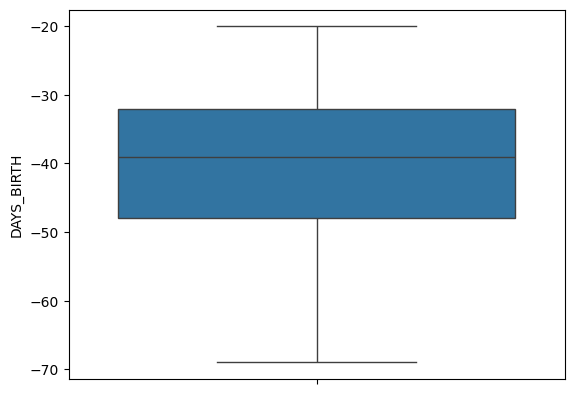

In [107]:
# 1 we will look in DAYS_BIRTH
sns.boxplot(application_data.DAYS_BIRTH)
plt.show()

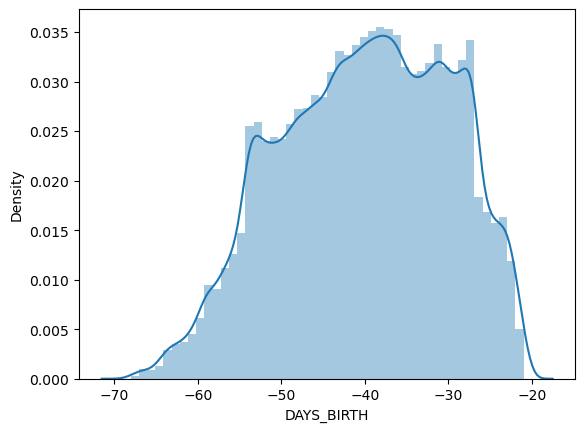

In [108]:
#it looks like there is no outlier in DAYS_BIRTH. now lets see distribution
sns.distplot(application_data.DAYS_BIRTH)
plt.show()

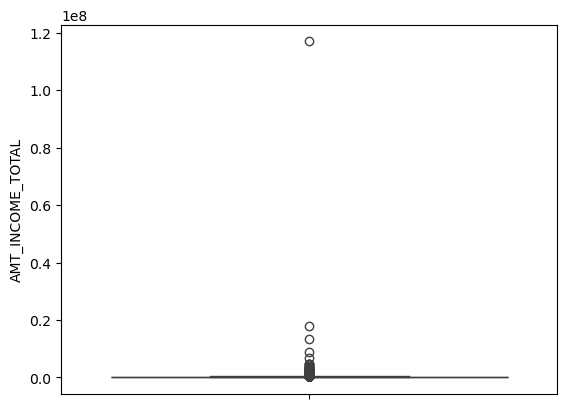

In [109]:
# 2 now we will look in AMT_INCOME_TOTAL column
sns.boxplot(application_data.AMT_INCOME_TOTAL)
plt.show()

###### From above we can clearly see that there is a person with very high income around 1.2 is an outlier


In [111]:
#removed the data point that was very high
application_data = application_data[application_data.AMT_INCOME_TOTAL <3000000 ]

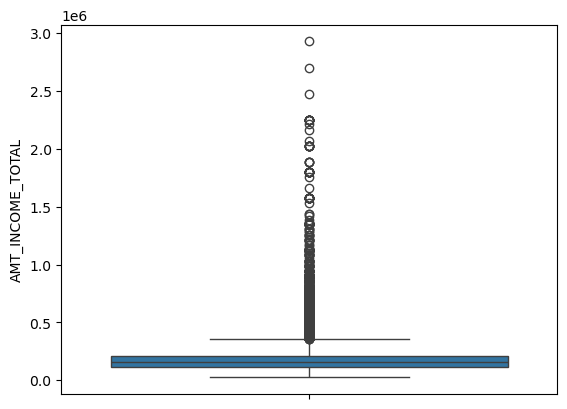

In [112]:
sns.boxplot(application_data.AMT_INCOME_TOTAL)
plt.show()

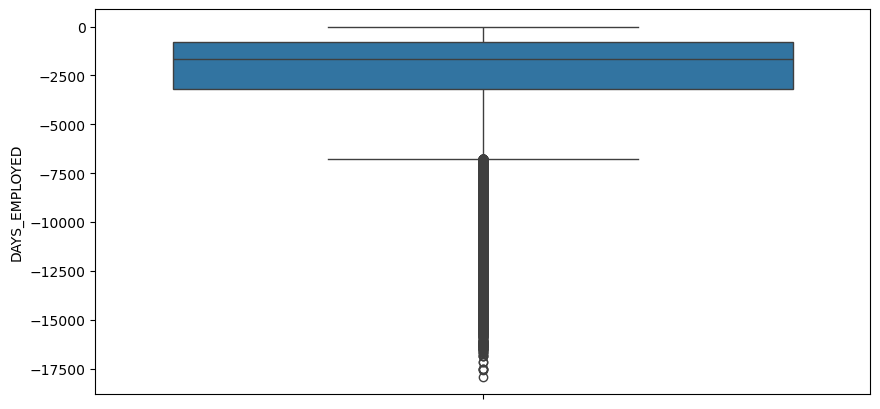

In [113]:
# 3 now we will look in DAYS_EMPLOYED column
plt.figure(figsize=[10,5])
sns.boxplot(application_data.DAYS_EMPLOYED)
plt.show()

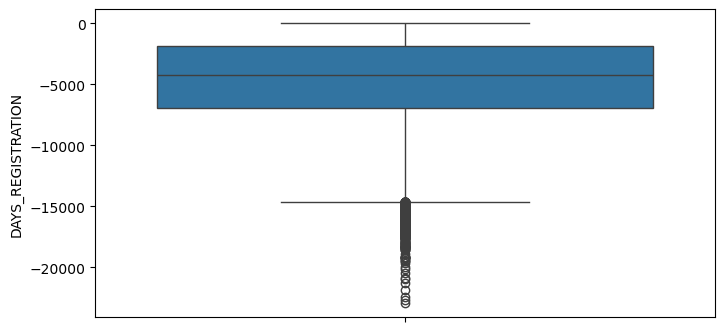

In [114]:
# 4 we will look in DAYS_REGISTRATION 
plt.figure(figsize=[8,4])
sns.boxplot(application_data.DAYS_REGISTRATION)
plt.show()

###### Here too days are reaching 25000 which is an outlier

In [116]:
application_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
CNT_CHILDREN                      int32
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int32
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION                 int32
DAYS_ID_PUBLISH                   int64
CNT_FAM_MEMBERS                   int32
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
WEEKDAY_APPR_PROCESS_START       object
HOUR_APPR_PROCESS_START           int64
REG_REGION_NOT_LIVE_REGION        int64


In [117]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0        202,500.00   406,597.50    24,700.50       351,000.00   
1        270,000.00 1,293,502.50    35,698.50     1,129,500.00   
2         67,500.00   135,000.00     6,750.00       135,000.00   
3        135,000.00   312,682.50    29,686.50       297,000.00   
4        121,500.00   513,000.00    21,865.50       513,000.00   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                        0.02   
1               Married  House / apartment                        0.00   
2  Single / not married  House / apartment                        0.01   
3        Civil marriage  House / apartment                        0.01   
4  Single / not married  House / apartment                        0.03   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0         -25           -637              -3648            -2120   
1         -45          -1188              -1186             -291   
2         -52           -225              -4260            -2531   
3         -52          -3039              -9833            -2437   
4         -54          -3038              -4311            -3458   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                1                     2                            2   
1                2                     1                            1   
2                1                     2                            2   
3                2                     2                            2   
4                1                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1   

In [118]:
num_cols=["TARGET","CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_BIRTH",
                "DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY",
       "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY"]

In [119]:
cat_cols=["Age_Category","AMT_INCOME_RANGE","NAME_CONTRACT_TYPE","CODE_GENDER","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","ORGANIZATION_TYPE","AMT_CREDIT_RANGE"]

## Now we will be doing Univariate analysis for categorical Variables 

In [121]:
def univariate(column,title,dimensions=[12,6],rotx=None,hue=None):
    sns.set_style("darkgrid")
    sns.set_palette("flare")
    plt.figure(figsize = dimensions)
    cntplot = sns.countplot(application_data[column],hue = hue)
    plt.xticks(rotation=rotx)
    plt.title(title)
plt.show()

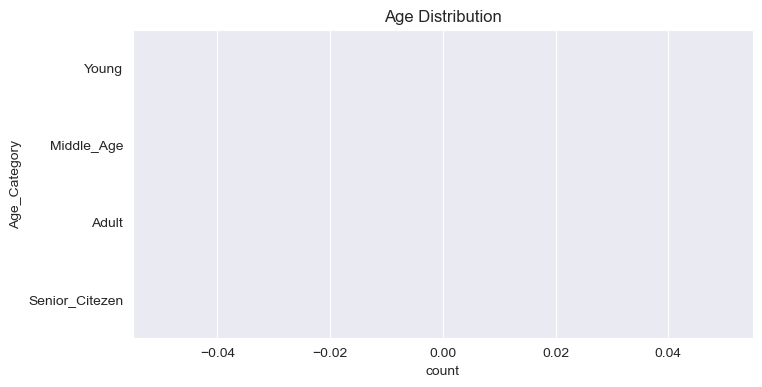

In [122]:
univariate(cat_cols[0],title="Age Distribution",dimensions=[8,4])

   There are maximum number of middle aged and adult people and very few senior citizens and young people

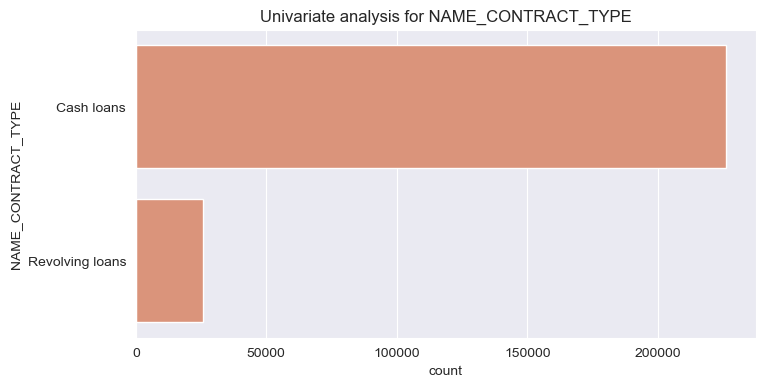

In [124]:
univariate(cat_cols[2],title="Univariate analysis for NAME_CONTRACT_TYPE",dimensions=[8,4])

There are high number of cash loans then revolving loans


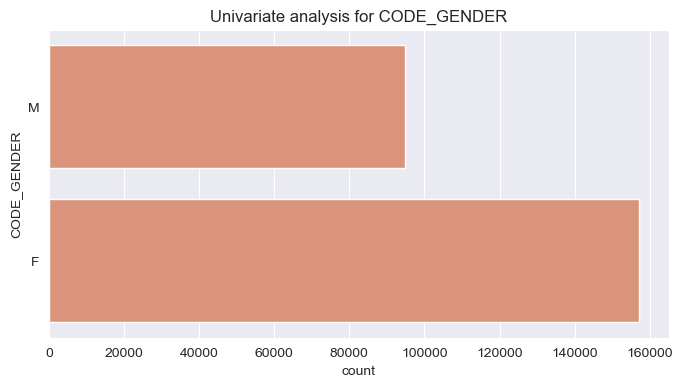

In [126]:
univariate(cat_cols[3],title="Univariate analysis for CODE_GENDER",dimensions=[8,4])

Females are in majority by observing above graph

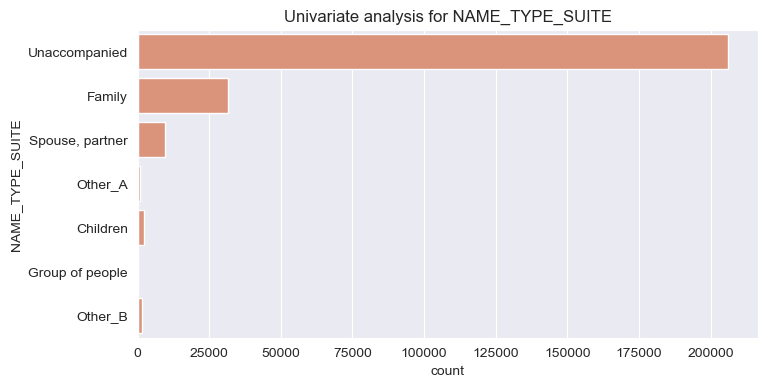

In [128]:
univariate(cat_cols[4],title="Univariate analysis for NAME_TYPE_SUITE",dimensions=[8,4])

Most of the clients are were unaccompanied when they applied for loan

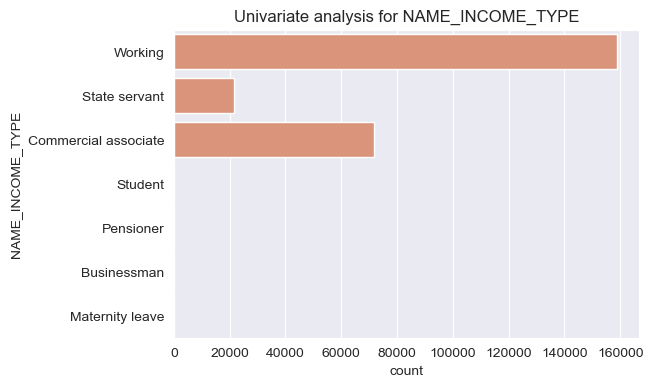

In [130]:
univariate(cat_cols[5],title="Univariate analysis for NAME_INCOME_TYPE",dimensions=[6,4])

Most of the clients were Working who apllied for loan.

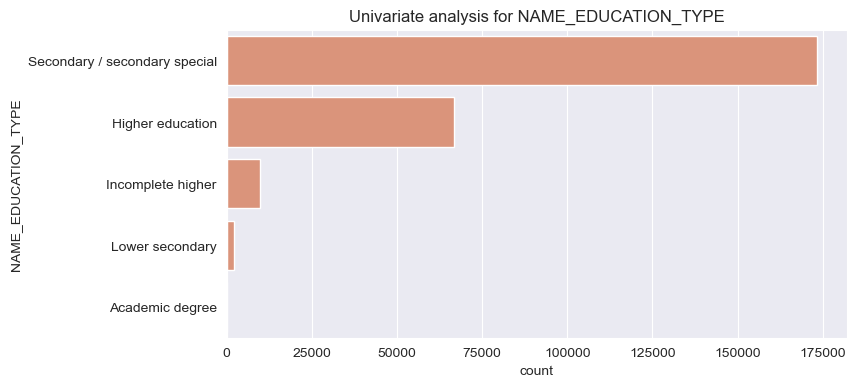

In [132]:
univariate(cat_cols[6],title="Univariate analysis for NAME_EDUCATION_TYPE",dimensions=[8,4])

Most of the applicants are secondary special and medium number of Applicants completed higher education.

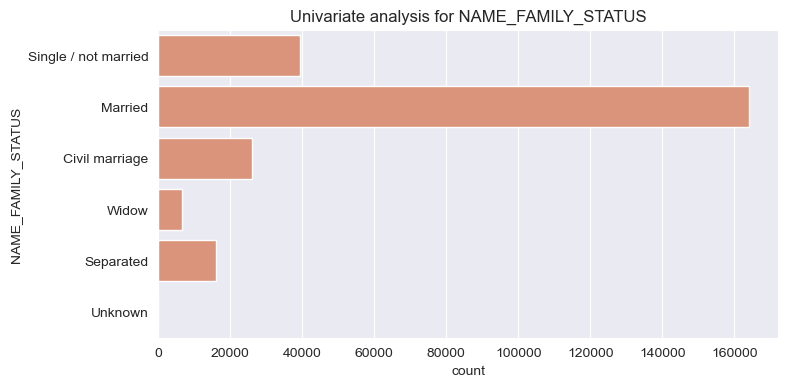

In [134]:
univariate(cat_cols[7],title="Univariate analysis for NAME_FAMILY_STATUS",dimensions=[8,4])

There are maximum number of married applicants applied for the loan

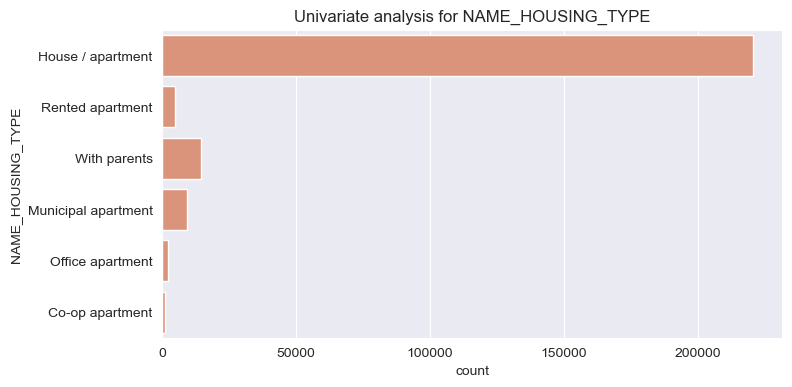

In [136]:
univariate(cat_cols[8],title="Univariate analysis for NAME_HOUSING_TYPE",dimensions=[8,4])

Most of the applicants are living in house/apartment while they applied for the loan

There are maximum number of laborers who applied for the loan

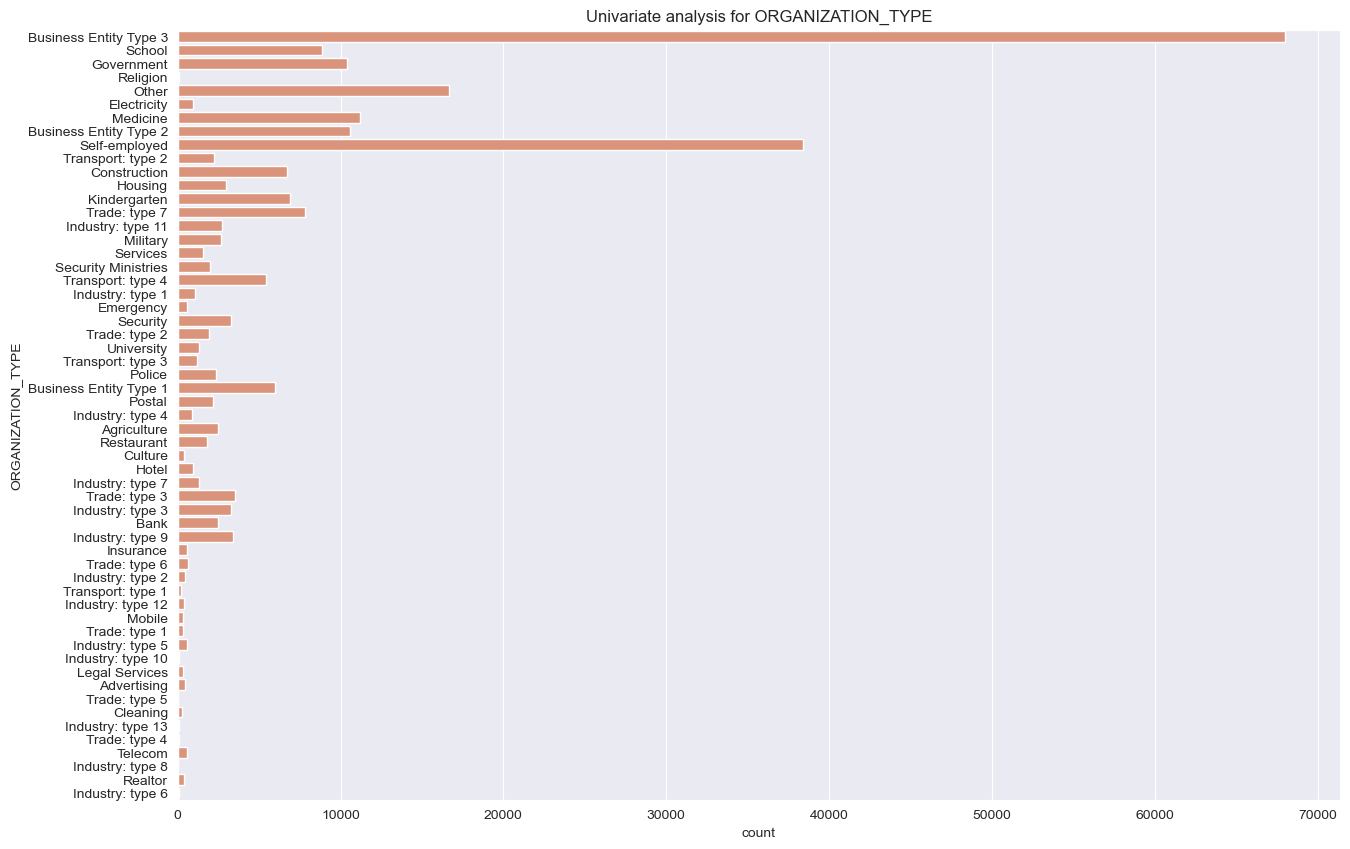

In [139]:
univariate(cat_cols[9],title="Univariate analysis for ORGANIZATION_TYPE",dimensions=[15,10])

## Univariate analysis for Numerical variables

In [141]:
["TARGET","CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_BIRTH",
                "DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY",
       "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY"]

['TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

In [142]:
def univariate_num(column,dimensions=[8,4],rotx=None,hue=None,tfont=20):
    sns.set_style("darkgrid")
    sns.set_palette("flare")
    plt.figure(figsize = dimensions)
    sns.histplot(application_data[column],hue = hue)
    plt.title(f'Univariate Analysis for {column} variable \n', fontdict={'fontsize':tfont})
    plt.xticks(rotation=rotx)
plt.show()

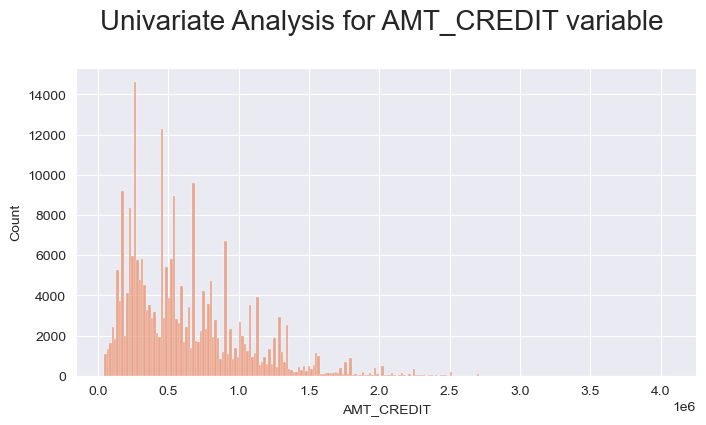

In [143]:
univariate_num(num_cols[3])

Most of the data is between 0.2 to 0.9 so most of the credits present between it

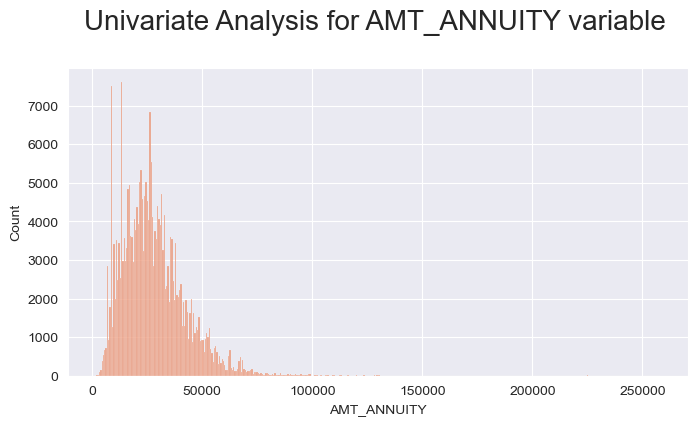

In [145]:
univariate_num(num_cols[4])

Most of the people having loan annuity between 15k to 45k

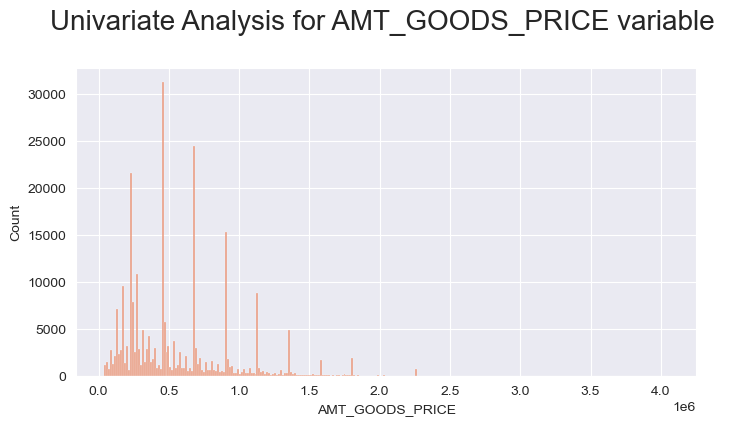

In [147]:
univariate_num(num_cols[5])

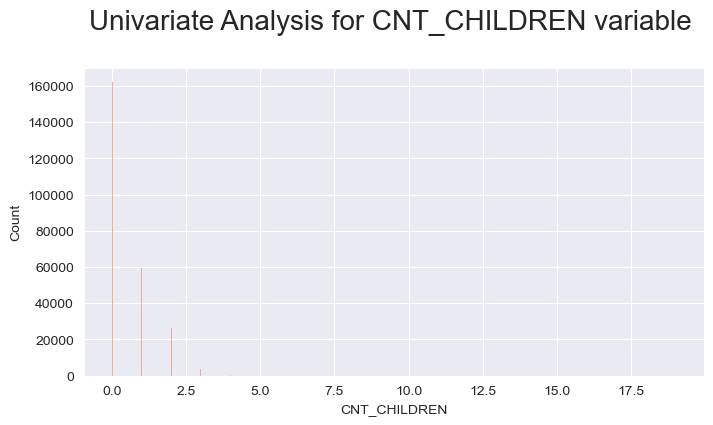

In [148]:
univariate_num(num_cols[1])

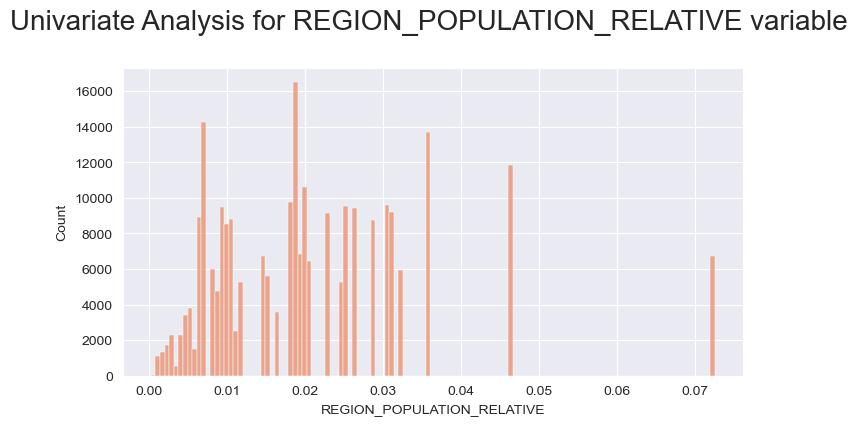

In [149]:
univariate_num(num_cols[6])

Most of the applicants who applied for the loan are between 25 years to 55 years of the age

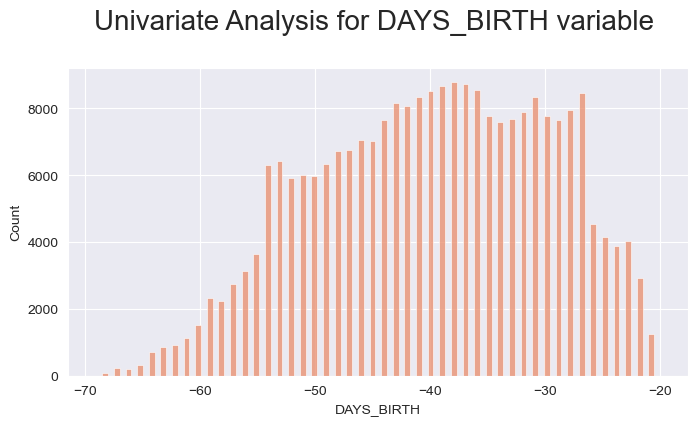

In [151]:
univariate_num(num_cols[7])

## Bivariate analysis of numerical vs numerical variables

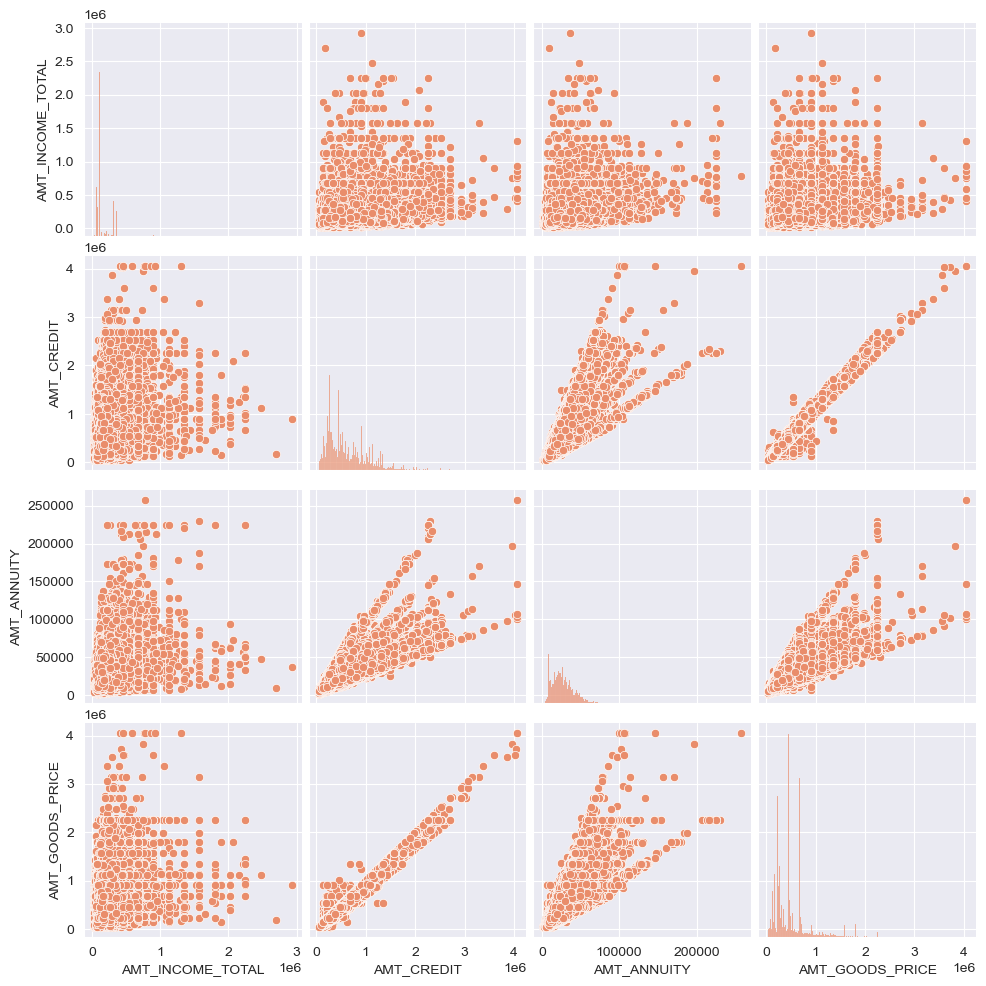

In [153]:
sns.pairplot(application_data[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]])
plt.show()

There is a strong correlation between AMT_CREDIT and AMT_GOODS_PRICE

## Bivariate analysis of Categorical vs numerical variables

In [156]:
catag_cols=["NAME_CONTRACT_TYPE","CODE_GENDER","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE"]

In [157]:
numer_cols=["AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]

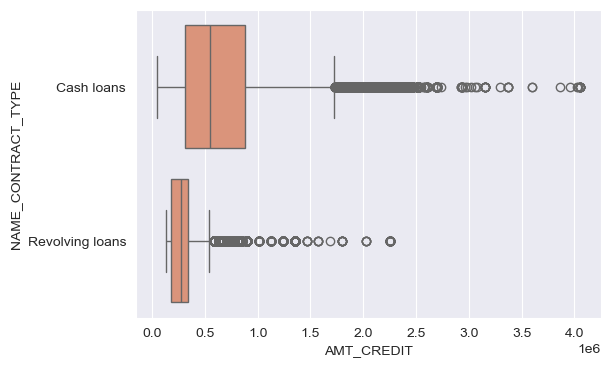

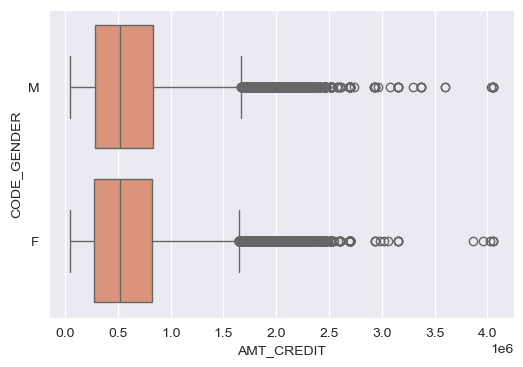

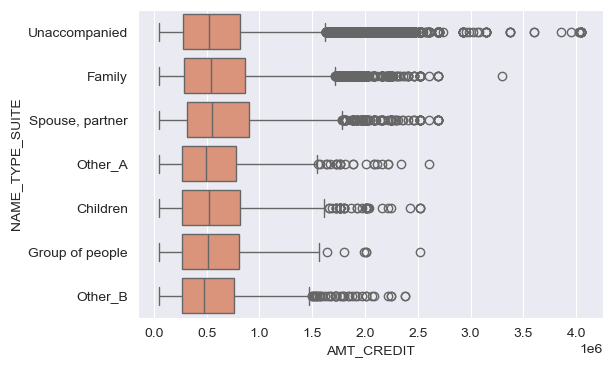

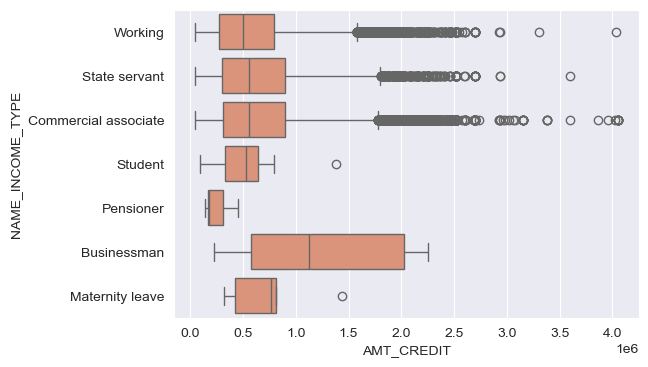

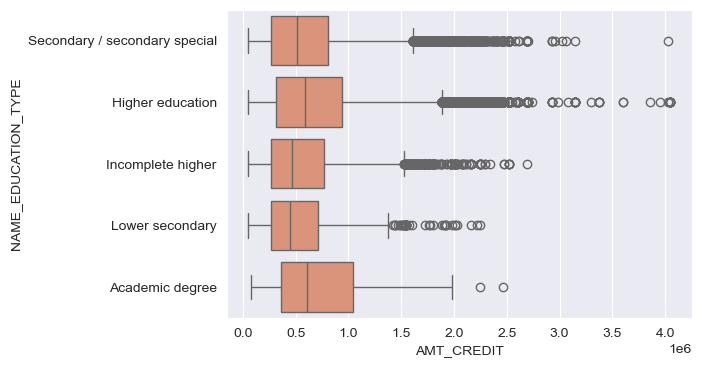

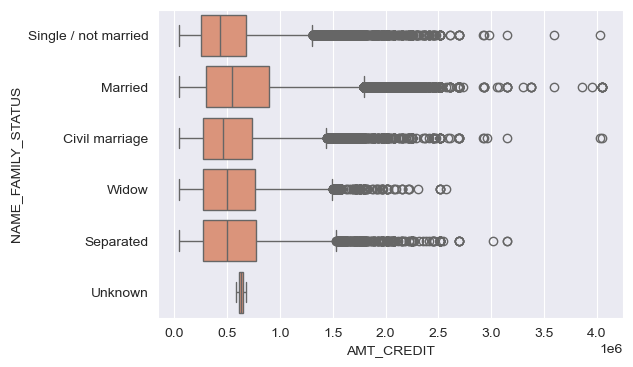

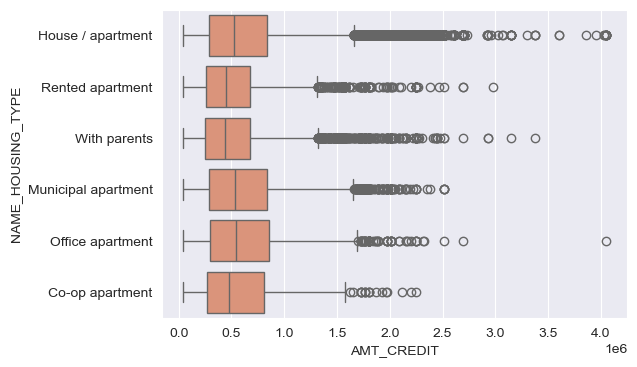

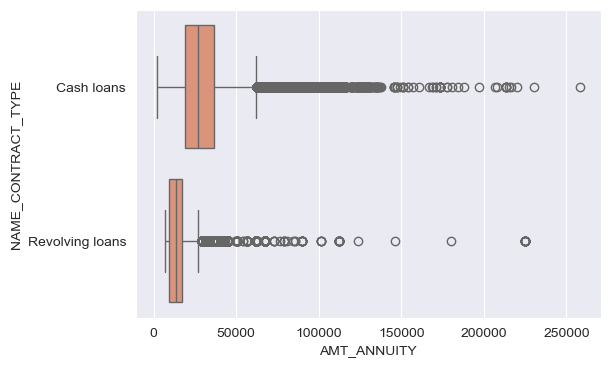

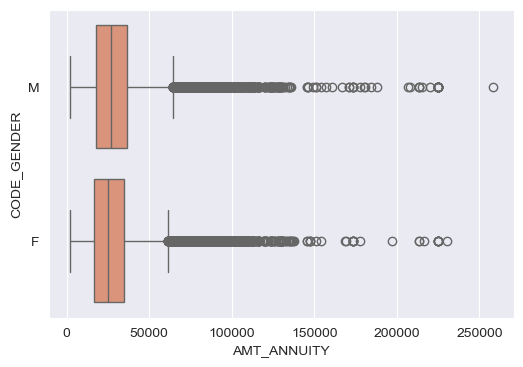

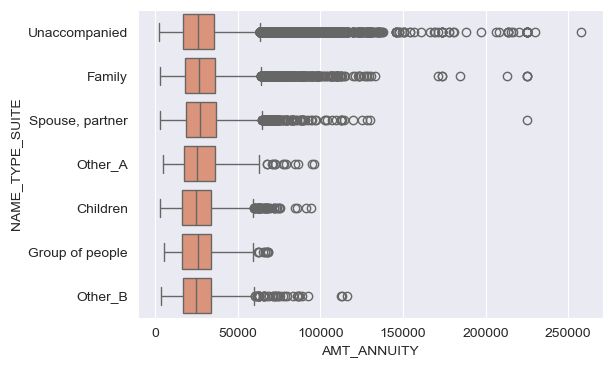

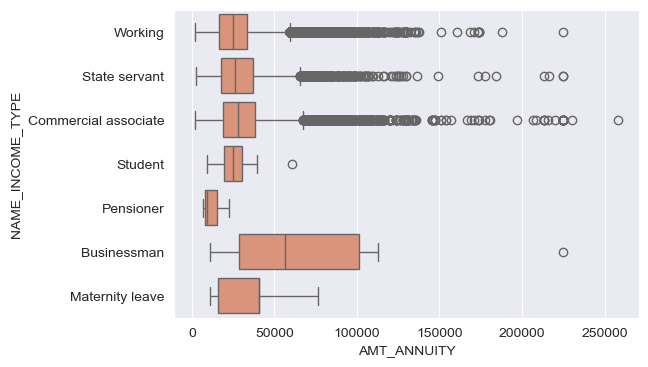

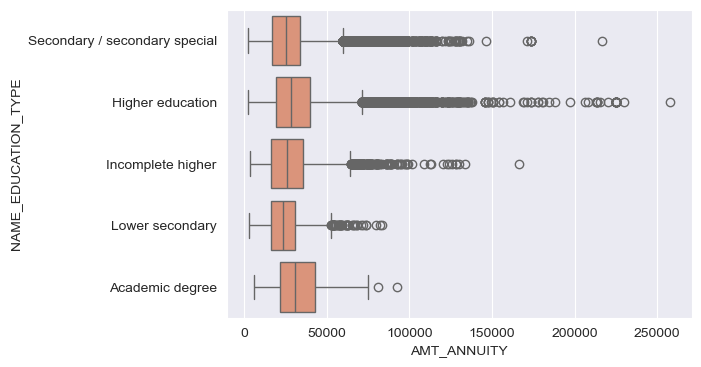

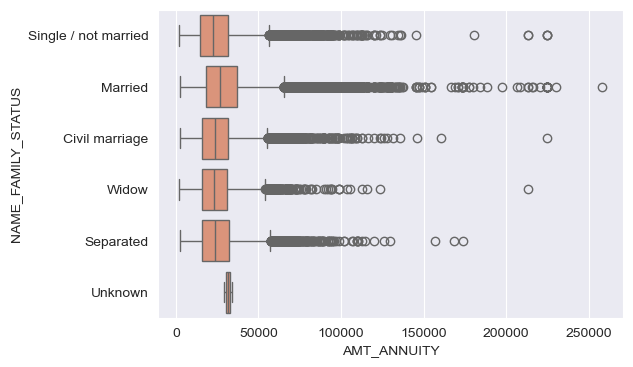

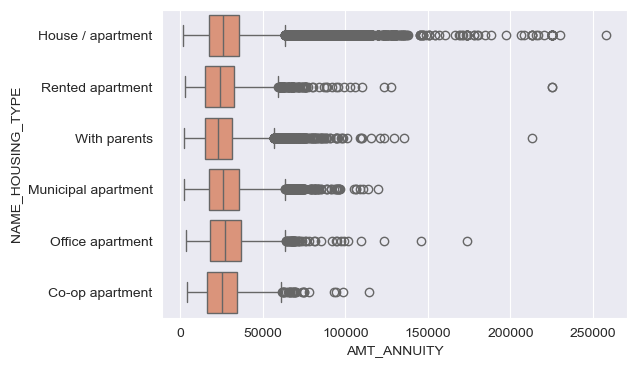

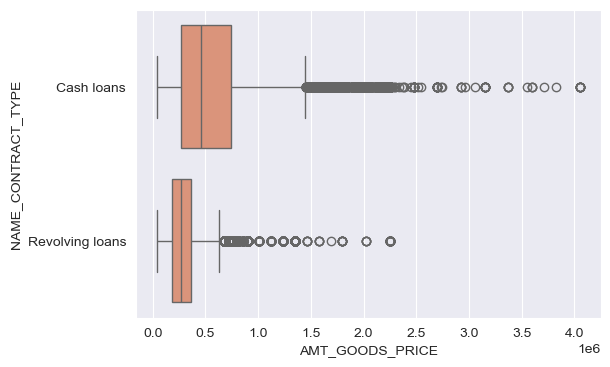

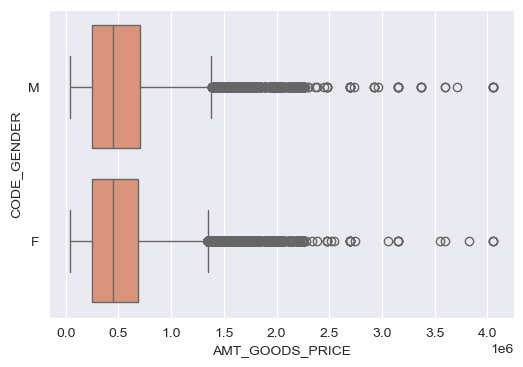

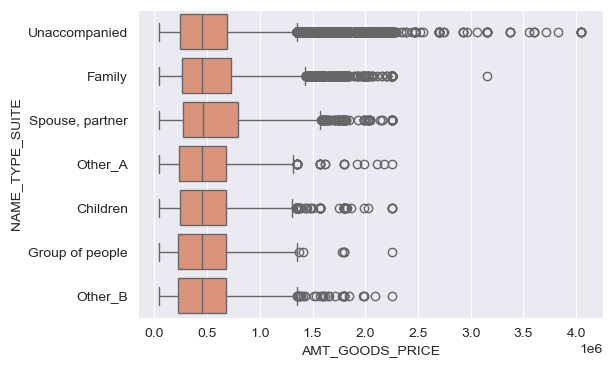

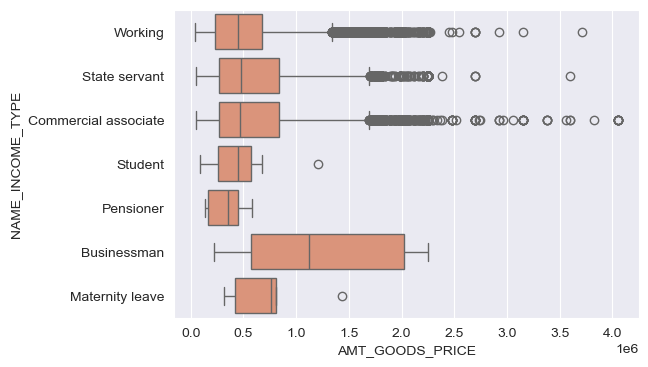

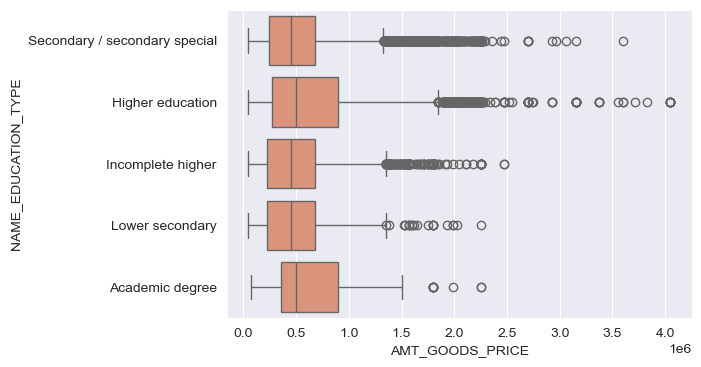

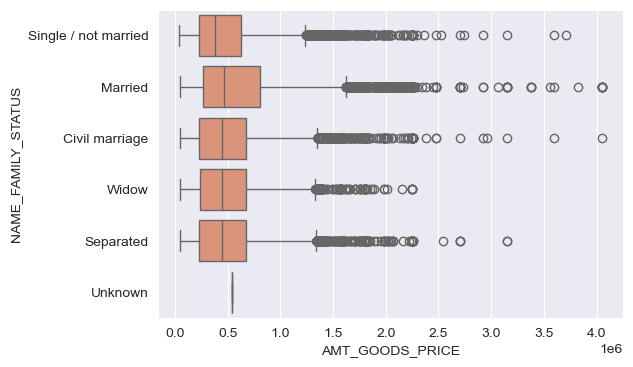

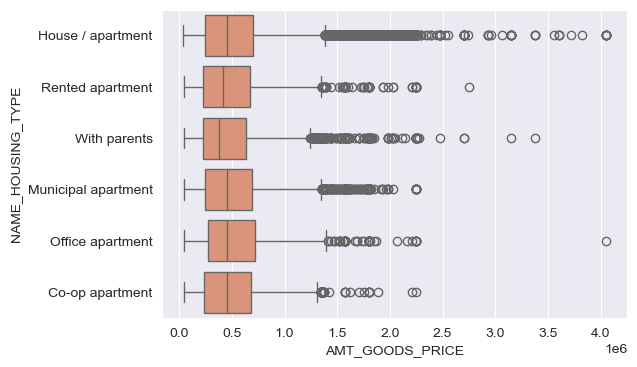

In [158]:
for col1 in numer_cols:
    for col2 in catag_cols:
        if col1!=col2:
            plt.figure(figsize=(6,4))
            sns.boxplot(x=application_data[col1],y=application_data[col2])
            plt.show()

By above graphs we can coclude that:
1. Cash loans have more credit amount of the loan.
2. Male candidates have slightly high amount of the credit loan.
3. Spouse partner and family member who accompanied have more credit amount of the loan.
4. Businessman have more credit amount of the loan.
5. Applicants with academic degree and in higher education have more credit amount of the loan.
6. Applicants with office apartment and municipal appartment have more credit amount of the loan.
7. Cash loans have high loan annuity.
8. Males have high loan annuity compare to female.
9. spouse partner have slightly high loan annuity.
10. Businessman have highest Loan annuity.
11. Applicants with academic degree and in higher education have more loan annuity.
12. Married applicants and seperated applicants have more loan annuity.
13. applicants living in house/apartment,office appartment,municipal apartment have more loan annuity.
14. Cash loans contains more consumer loans
15. Males have slightly more consumer loans

## Numerical Univariate Analysis for target variable 0(with no payment difficulties),1(with payment difficulties)

In [161]:
numer_cols=["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]

In [162]:
def univariate_target_num(target_0,target_1,dimensions=[8,4],rotx=None,hue=None,tfont=10):
    sns.set_style("darkgrid")
    sns.set_palette("flare")
    plt.figure(figsize = dimensions)
    plt.subplot(1,2,1)
    plt.title("With no Payment difficulties", fontdict={'fontsize':tfont})
    sns.histplot(target_0,hue = hue)
    plt.xticks(rotation=rotx)
    plt.subplot(1,2,2)
    plt.title("With payment difficulties", fontdict={'fontsize':tfont})
    sns.histplot(target_1,hue = hue)
    plt.xticks(rotation=rotx)
plt.show()

#### For AMT_CREDIT

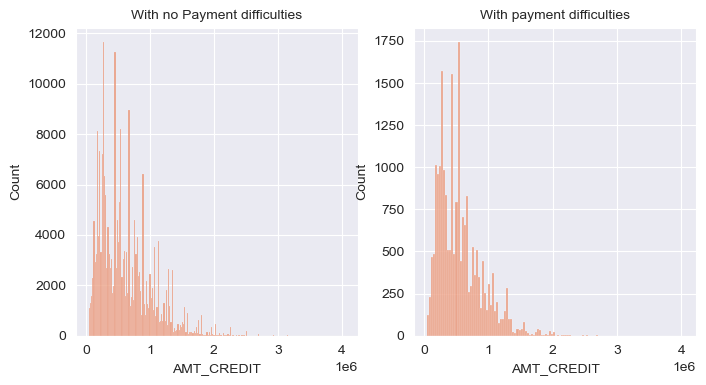

In [164]:
univariate_target_num(target_0["AMT_CREDIT"],target_1["AMT_CREDIT"])

Applicants with payment difficulties exist between 0 and 1

#### For AMT_ANNUITY

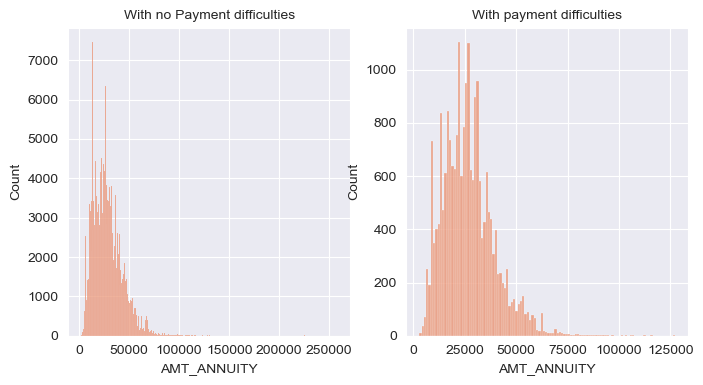

In [167]:
univariate_target_num(target_0["AMT_ANNUITY"],target_1["AMT_ANNUITY"])

Applicants with payment difficulties exist between 15K to 45K Approx

#### For AMT_GOODS_PRICE

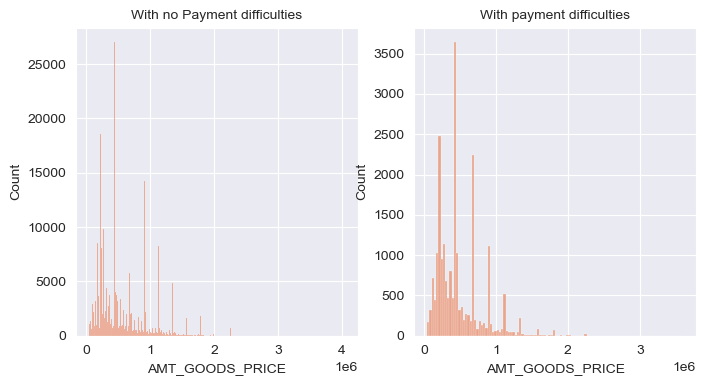

In [170]:
univariate_target_num(target_0["AMT_GOODS_PRICE"],target_1["AMT_GOODS_PRICE"])

Both look similar

##  Categorical Univariate Analysis for target variable 0(with no payment difficulties)

In [173]:
["AMT_INCOME_RANGE","NAME_CONTRACT_TYPE","CODE_GENDER","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","ORGANIZATION_TYPE","AMT_CREDIT_RANGE"]

['AMT_INCOME_RANGE',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE',
 'AMT_CREDIT_RANGE']

#### AMT_INCOME_RANGE column

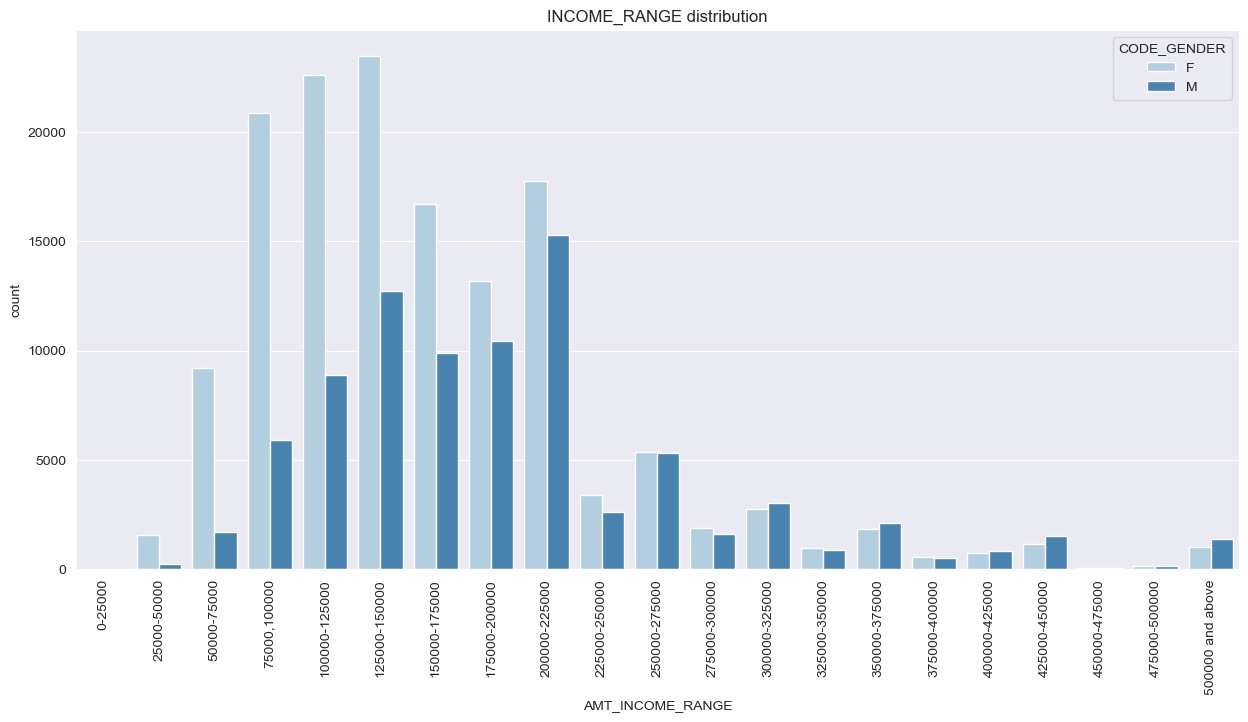

In [175]:
plt.figure(figsize=(15,7))
sns.countplot(target_0,x="AMT_INCOME_RANGE",hue="CODE_GENDER",palette="Blues")
plt.title("INCOME_RANGE distribution")
plt.xticks(rotation=90)
plt.show()

1. Very less applicants above 400000 and above
2. Most of the Applicants are female.
3. Most of the applicants have income in range 1 lakh to 2 lakh.

#### For NAME_CONTRACT_TYPE column

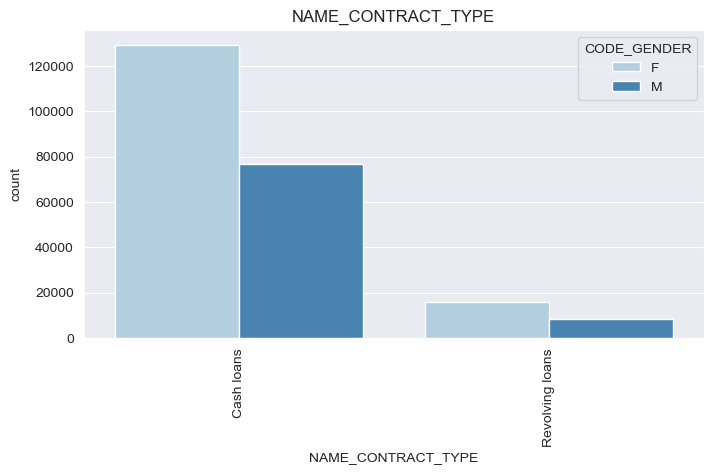

In [178]:
plt.figure(figsize=(8,4))
sns.countplot(target_0,x="NAME_CONTRACT_TYPE",hue="CODE_GENDER",palette="Blues")
plt.title("NAME_CONTRACT_TYPE")
plt.xticks(rotation=90)
plt.show()

Most of the Apllicants are having cash loans and females are more in number

#### For NAME_TYPE_SUITE column

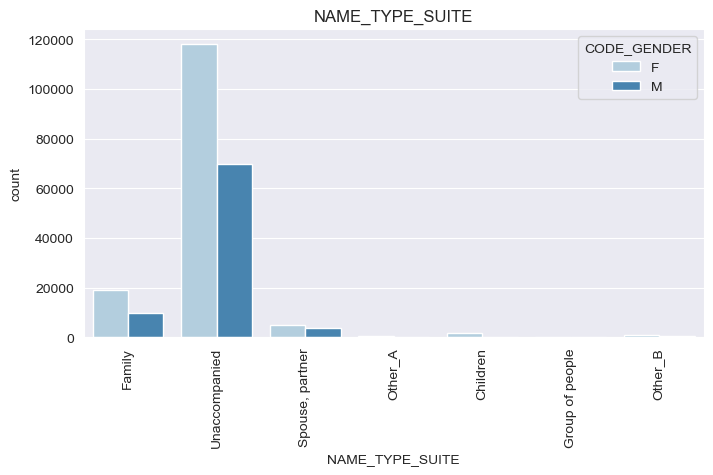

In [181]:
plt.figure(figsize=(8,4))
sns.countplot(target_0,x="NAME_TYPE_SUITE",hue="CODE_GENDER",palette="Blues")
plt.title("NAME_TYPE_SUITE")
plt.xticks(rotation=90)
plt.show()

Most of the Apllicants are unaccompanied at the time of applying for loan and are Females in all categories

#### For NAME_INCOME_TYPE column

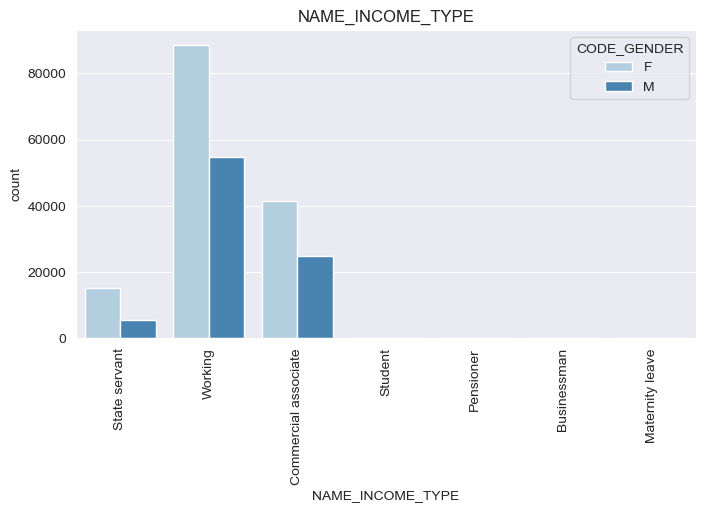

In [184]:
plt.figure(figsize=(8,4))
sns.countplot(target_0,x="NAME_INCOME_TYPE",hue="CODE_GENDER",palette="Blues")
plt.title("NAME_INCOME_TYPE")
plt.xticks(rotation=90)
plt.show()

Most of the Apllicants are Working and are Females in all categories

#### For NAME_EDUCATION_TYPE column

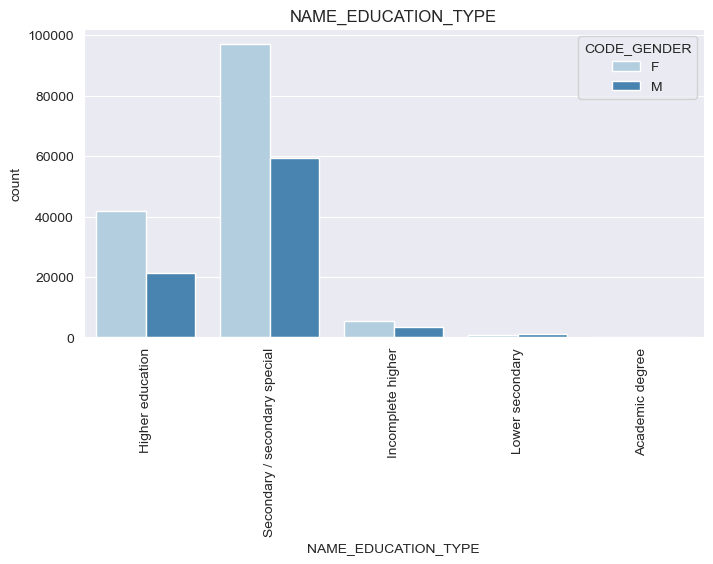

In [187]:
plt.figure(figsize=(8,4))
sns.countplot(target_0,x="NAME_EDUCATION_TYPE",hue="CODE_GENDER",palette="Blues")
plt.title("NAME_EDUCATION_TYPE")
plt.xticks(rotation=90)
plt.show()

Most of the Apllicants are Secondary/Secondary special and are Females in all categories

#### For NAME_FAMILY_STATUS column

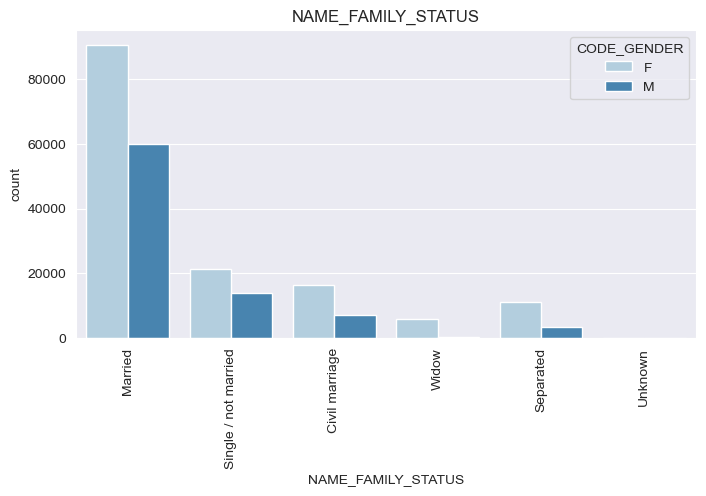

In [190]:
plt.figure(figsize=(8,4))
sns.countplot(target_0,x="NAME_FAMILY_STATUS",hue="CODE_GENDER",palette="Blues")
plt.title("NAME_FAMILY_STATUS")
plt.xticks(rotation=90)
plt.show()

Most of the Apllicants are Married and are Females in all categories

#### For NAME_HOUSING_TYPE column

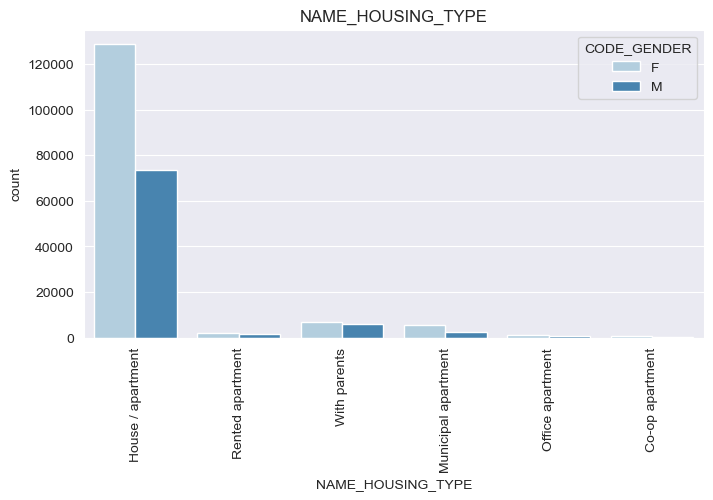

In [193]:
plt.figure(figsize=(8,4))
sns.countplot(target_0,x="NAME_HOUSING_TYPE",hue="CODE_GENDER",palette="Blues")
plt.title("NAME_HOUSING_TYPE")
plt.xticks(rotation=90)
plt.show()

Most of the Apllicants are having House/apartment

#### For ORGANIZATION_TYPE column

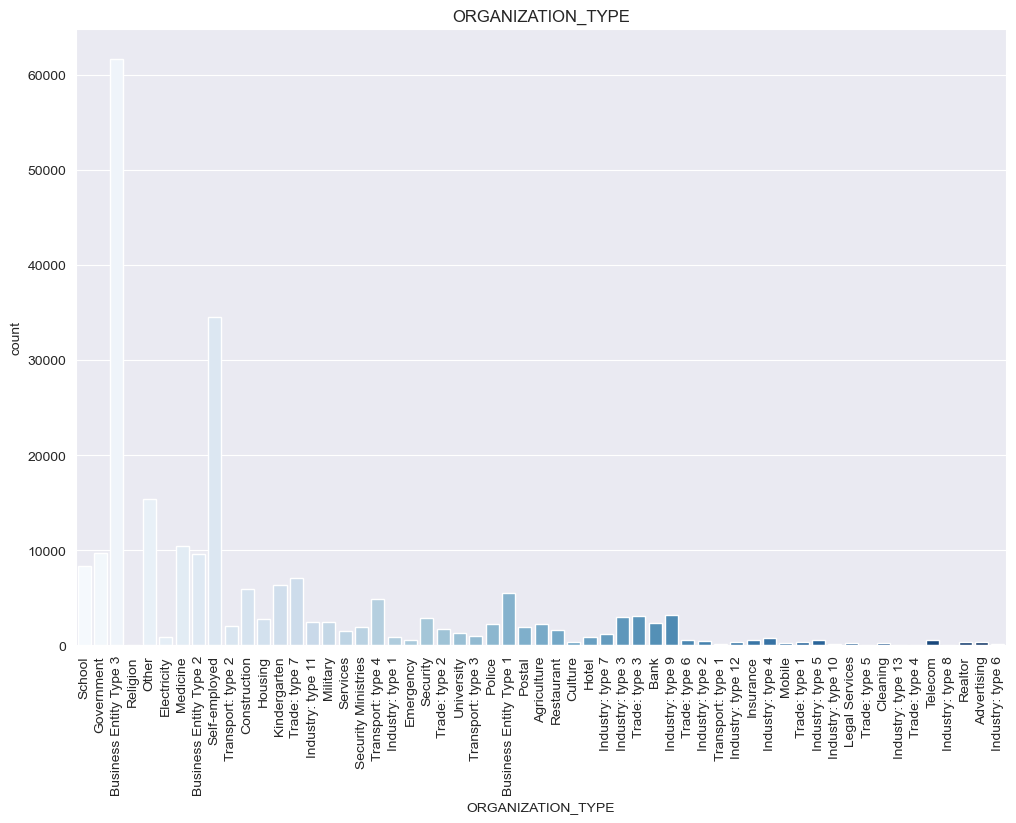

In [196]:
plt.figure(figsize=(12,8))
sns.countplot(target_0,x="ORGANIZATION_TYPE",palette="Blues")
plt.title("ORGANIZATION_TYPE")
plt.xticks(rotation=90)
plt.show()

Most of the Apllicants are from ‘Business entity Type 3’,Self employed and Medicine.

#### For AMT_CREDIT_RANGE Column

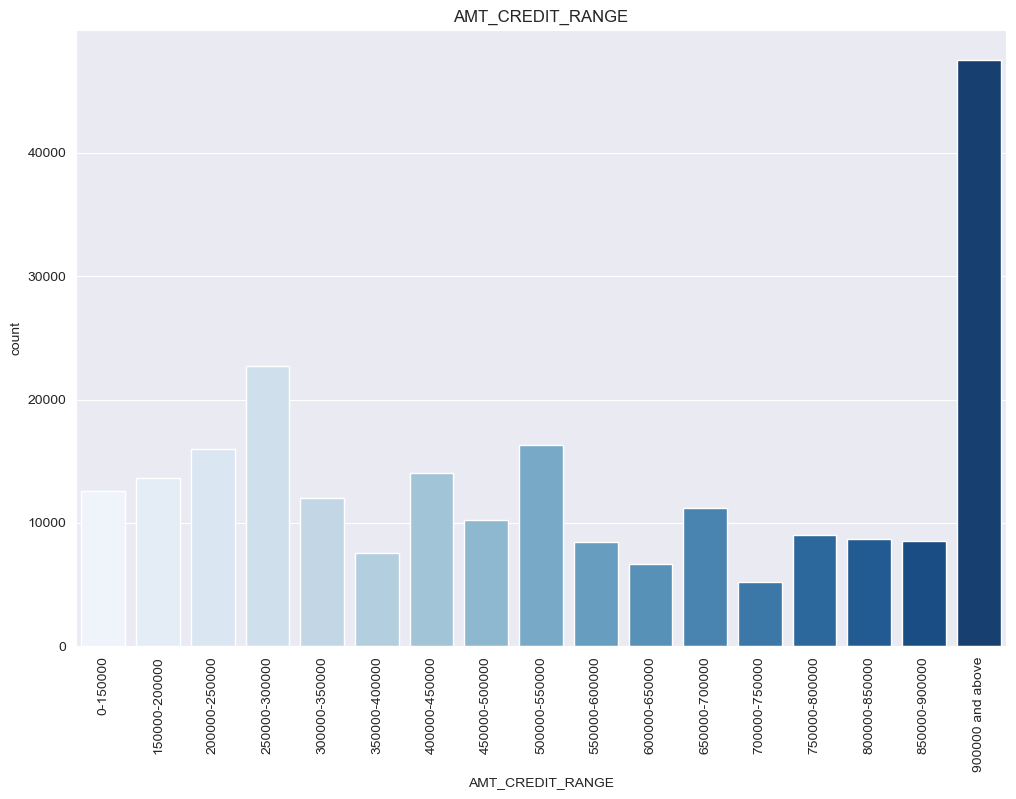

In [199]:
plt.figure(figsize=(12,8))
sns.countplot(target_0,x="AMT_CREDIT_RANGE",palette="Blues")
plt.title("AMT_CREDIT_RANGE")
plt.xticks(rotation=90)
plt.show()

We can clearly see more number of credits amount of loan are above range 900000 and above

## Categorical Univariate Analysis for target variable 1(with payment difficulties or Defaulters)

In [202]:
["Age_Category","AMT_INCOME_RANGE","NAME_CONTRACT_TYPE","CODE_GENDER","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","ORGANIZATION_TYPE","AMT_CREDIT_RANGE"]

['Age_Category',
 'AMT_INCOME_RANGE',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE',
 'AMT_CREDIT_RANGE']

##### For AMT_INCOME_RANGE column

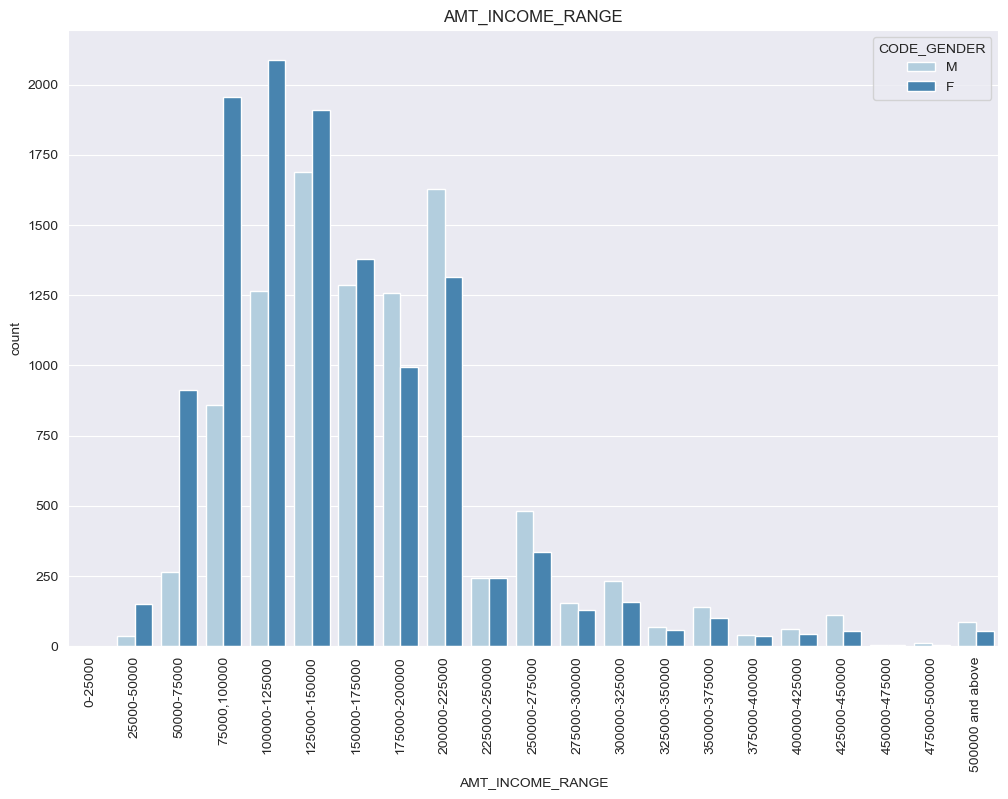

In [204]:
plt.figure(figsize=(12,8))
sns.countplot(target_1,x="AMT_INCOME_RANGE",palette="Blues",hue="CODE_GENDER")
plt.title("AMT_INCOME_RANGE")
plt.xticks(rotation=90)
plt.show()

1. Most of the Apllicants who is defaulting has a income range between 50000 to 225000 thousand.
2. Male % increased in all categories who is defaulting.

##### For NAME_CONTRACT_TYPE column

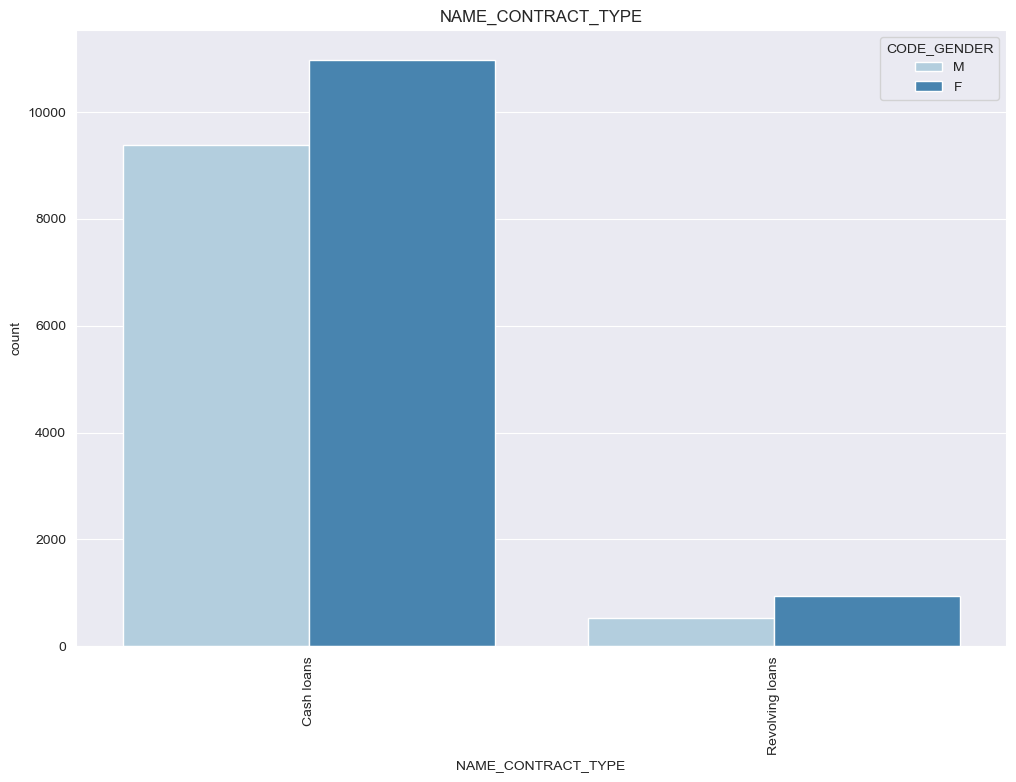

In [207]:
plt.figure(figsize=(12,8))
sns.countplot(target_1,x="NAME_CONTRACT_TYPE",palette="Blues",hue="CODE_GENDER")
plt.title("NAME_CONTRACT_TYPE")
plt.xticks(rotation=90)
plt.show()

1. Most of the Apllicants are having cash loans Who tends to default.
2. Females are more in number.

##### For NAME_TYPE_SUITE column

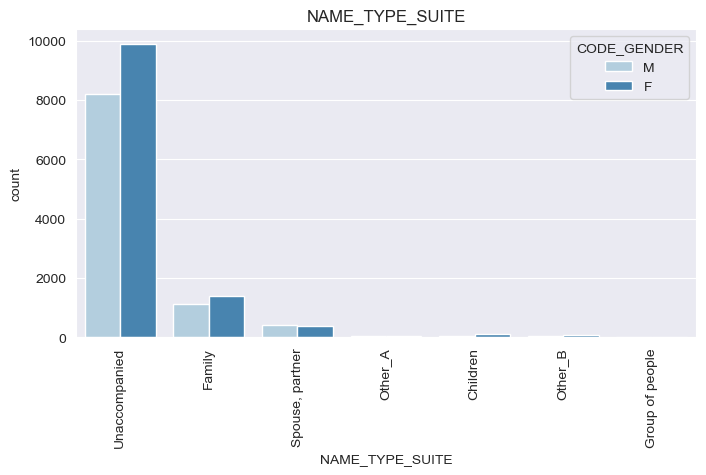

In [210]:
plt.figure(figsize=(8,4))
sns.countplot(target_1,x="NAME_TYPE_SUITE",palette="Blues",hue="CODE_GENDER")
plt.title("NAME_TYPE_SUITE")
plt.xticks(rotation=90)
plt.show()

1. Most of the Apllicants are Unaccompanied at the time of applying loan Who tends to default.
2. Male % increased in all categories who is defaulting.

# For NAME_INCOME_TYPE column

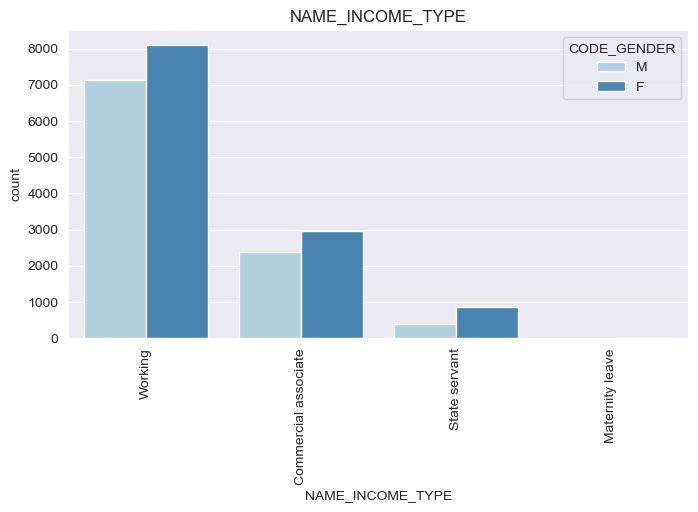

In [213]:
plt.figure(figsize=(8,4))
sns.countplot(target_1,x="NAME_INCOME_TYPE",palette="Blues",hue="CODE_GENDER")
plt.title("NAME_INCOME_TYPE")
plt.xticks(rotation=90)
plt.show()

1. Most of the Apllicants are Working and Commercial associate Who tends to default.
2. Male % increased in all categories who is defaulting.

##### For NAME_EDUCATION_TYPE column

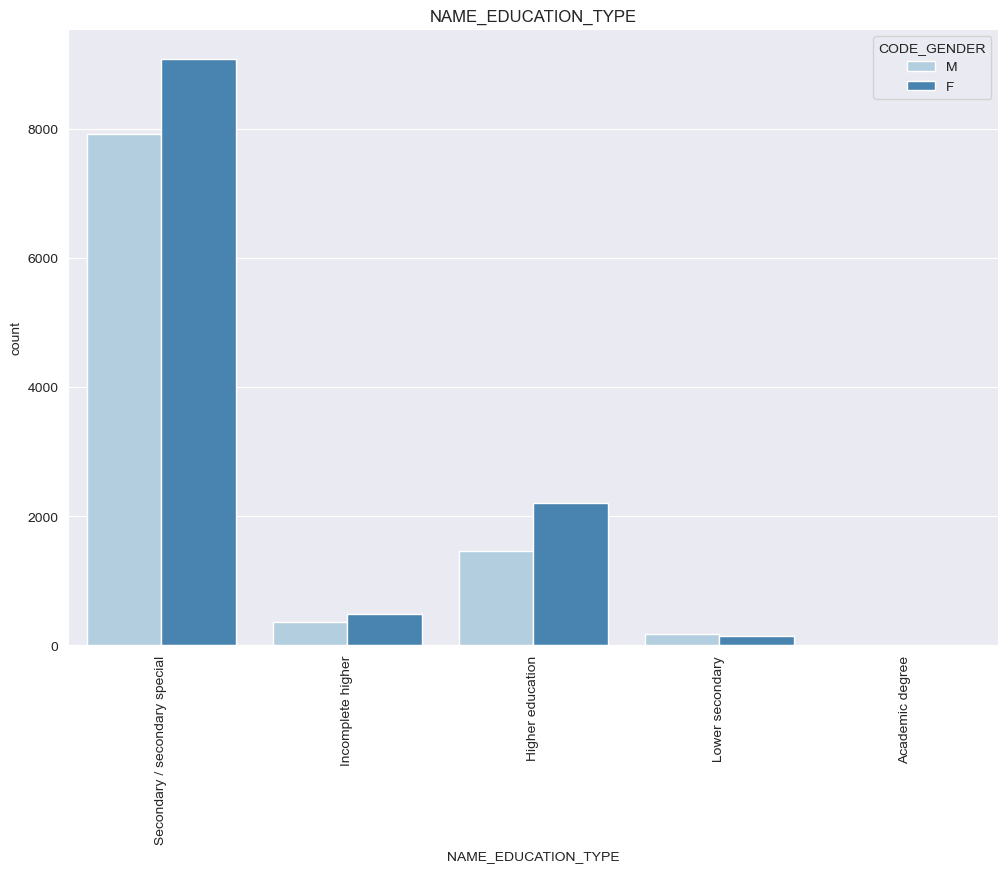

In [216]:
plt.figure(figsize=(12,8))
sns.countplot(target_1,x="NAME_EDUCATION_TYPE",palette="Blues",hue="CODE_GENDER")
plt.title("NAME_EDUCATION_TYPE")
plt.xticks(rotation=90)
plt.show()

1. Most of the Apllicants are Secondary/Secondary special and Higher Education Who tends to default.
2. Male % increased in all categories who is defaulting

##### For NAME_FAMILY_STATUS column

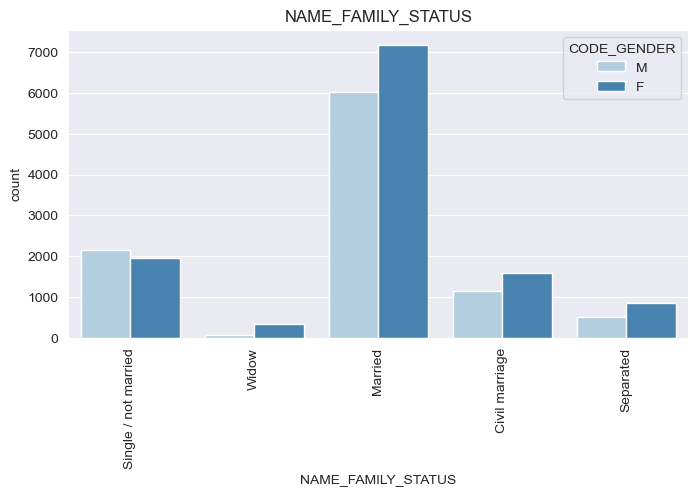

In [219]:
plt.figure(figsize=(8,4))
sns.countplot(target_1,x="NAME_FAMILY_STATUS",palette="Blues",hue="CODE_GENDER")
plt.title("NAME_FAMILY_STATUS")
plt.xticks(rotation=90)
plt.show()

1. Most of the Apllicants are Married Who tends to default.
2. Male % increased in all categories who is defaulting.

##### For NAME_HOUSING_TYPE column

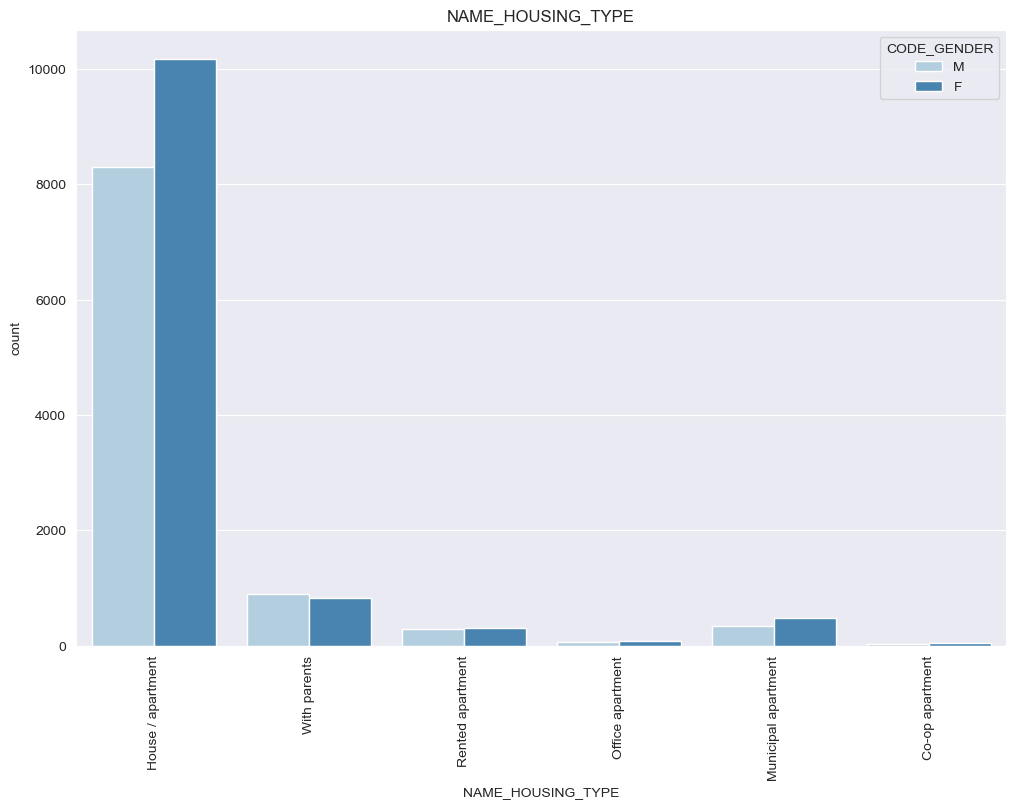

In [222]:
plt.figure(figsize=(12,8))
sns.countplot(target_1,x="NAME_HOUSING_TYPE",palette="Blues",hue="CODE_GENDER")
plt.title("NAME_HOUSING_TYPE")
plt.xticks(rotation=90)
plt.show()

1. Most of the Apllicants are having House/apartment Who tends to default.
2. Male % increased in all categories who is defaulting

##### For ORGANIZATION_TYPE column

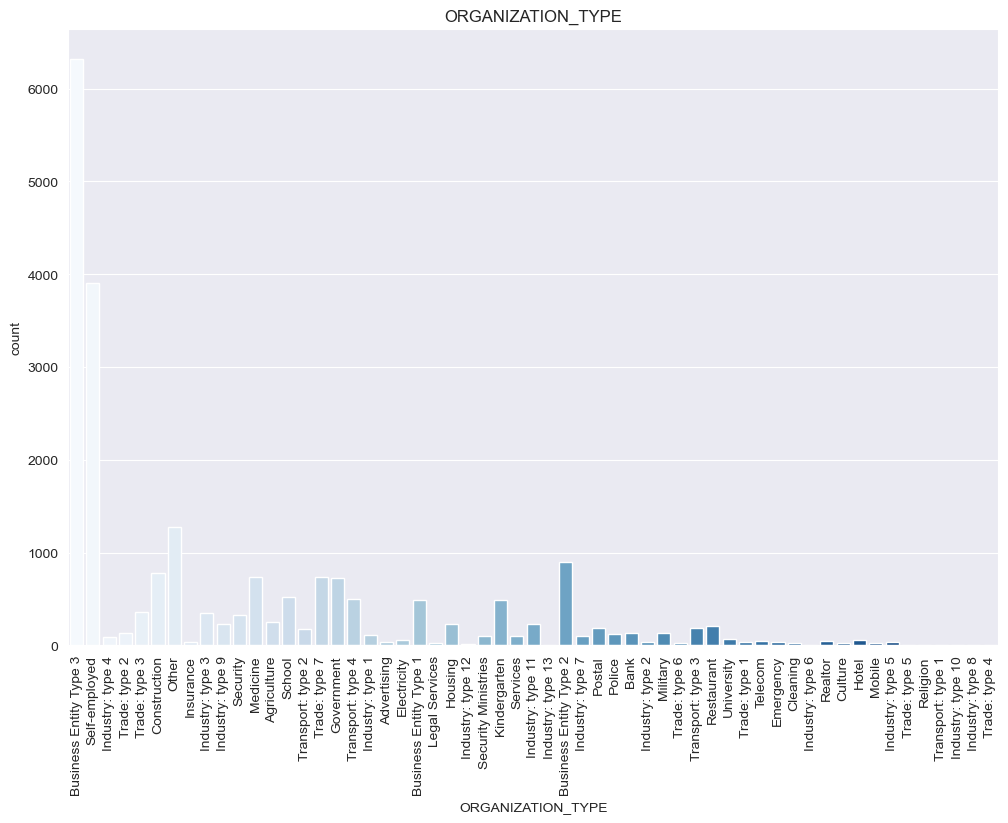

In [225]:
plt.figure(figsize=(12,8))
sns.countplot(target_1,x="ORGANIZATION_TYPE",palette="Blues")
plt.title("ORGANIZATION_TYPE")
plt.xticks(rotation=90)
plt.show()

1. Business Entity Type 3, Business Entity Type 2,Self-Employed, other and Medicine are defaulting more.

##### For AMT_CREDIT_RANGE column

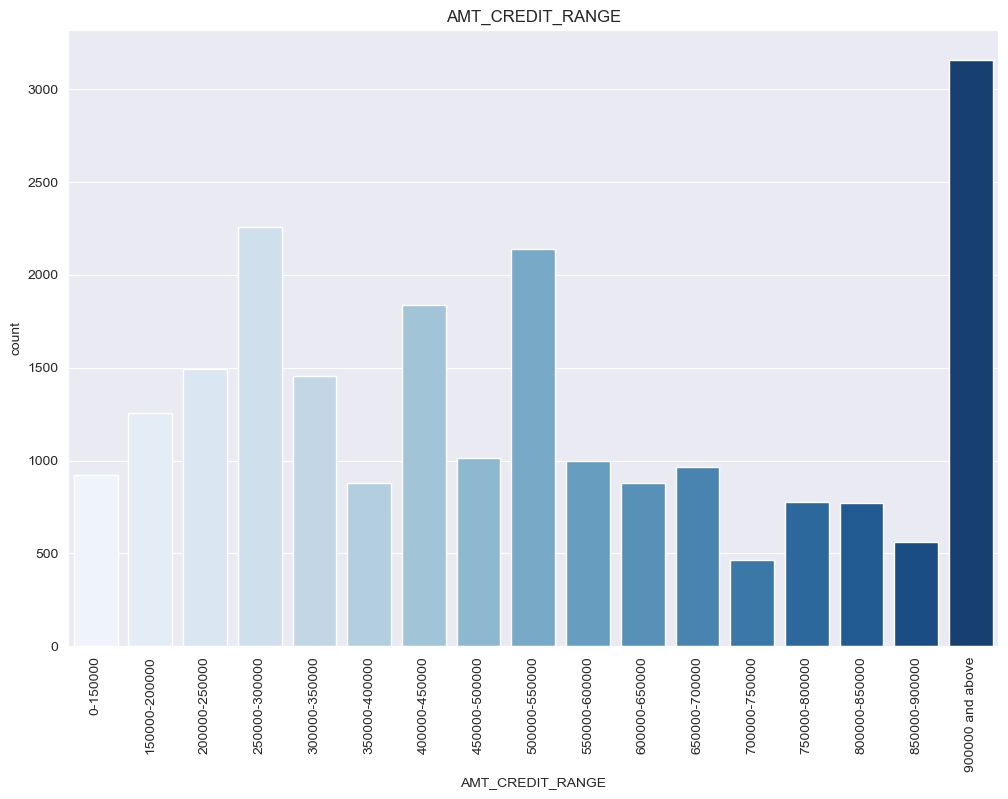

In [228]:
plt.figure(figsize=(12,8))
sns.countplot(target_1,x="AMT_CREDIT_RANGE",palette="Blues")
plt.title("AMT_CREDIT_RANGE")
plt.xticks(rotation=90)
plt.show()

1. We can clearly see more number of credits amount of loan are above range 900000 and above Who tends to default
2. Same observation as previous like target_0

## Calculating the correlation among the target_0 people

In [231]:
target_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   
5      100008       0         Cash loans           M             0   

   AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1        270,000.00 1,293,502.50    35,698.50     1,129,500.00   
2         67,500.00   135,000.00     6,750.00       135,000.00   
3        135,000.00   312,682.50    29,686.50       297,000.00   
4        121,500.00   513,000.00    21,865.50       513,000.00   
5         99,000.00   490,495.50    27,517.50       454,500.00   

   NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1           Family    State servant               Higher education   
2    Unaccompanied          Working  Secondary / secondary special   
3    Unaccompanied          Working  Secondary / secondary special   
4    Unaccompanied          Working  Secondary / secondary special   
5  Spouse, partner    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
1               Married  House / apartment                        0.00   
2  Single / not married  House / apartment                        0.01   
3        Civil marriage  House / apartment                        0.01   
4  Single / not married  House / apartment                        0.03   
5               Married  House / apartment                        0.04   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
1         -45          -1188              -1186             -291   
2         -52           -225              -4260            -2531   
3         -52          -3039              -9833            -2437   
4         -54          -3038              -4311            -3458   
5         -46          -1588              -4970             -477   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                2                     1                            1   
2                1                     2                            2   
3                2                     2                            2   
4                1                     2                            2   
5                2                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Religion   
5                     

In [232]:
target_0_num=target_0[["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_ID_PUBLISH","REG_REGION_NOT_LIVE_REGION","LIVE_REGION_NOT_WORK_REGION"]]

In [233]:
target_0_corr = target_0_num.iloc[:, :].corr()
target_0_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                         1.00             -0.01       -0.02   
AMT_INCOME_TOTAL                    -0.01              1.00        0.33   
AMT_CREDIT                          -0.02              0.33        1.00   
AMT_ANNUITY                         -0.01              0.40        0.76   
AMT_GOODS_PRICE                     -0.02              0.33        0.99   
REGION_POPULATION_RELATIVE          -0.03              0.17        0.10   
DAYS_BIRTH                           0.24             -0.05       -0.15   
DAYS_EMPLOYED                        0.06             -0.03       -0.09   
DAYS_ID_PUBLISH                     -0.12             -0.03       -0.03   
REG_REGION_NOT_LIVE_REGION          -0.02              0.06        0.02   
LIVE_REGION_NOT_WORK_REGION         -0.01              0.12        0.05   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                       -0.01            -0.02   
AMT_INCOME_TOTAL                    0.40             0.33   
AMT_CREDIT                          0.76             0.99   
AMT_ANNUITY                         1.00             0.77   
AMT_GOODS_PRICE                     0.77             1.00   
REGION_POPULATION_RELATIVE          0.12             0.11   
DAYS_BIRTH                         -0.09            -0.15   
DAYS_EMPLOYED                      -0.05            -0.09   
DAYS_ID_PUBLISH                    -0.03            -0.04   
REG_REGION_NOT_LIVE_REGION          0.04             0.02   
LIVE_REGION_NOT_WORK_REGION         0.07             0.05   

                             REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
CNT_CHILDREN                                      -0.03        0.24   
AMT_INCOME_TOTAL                                   0.17       -0.05   
AMT_CREDIT                                         0.10       -0.15   
AMT_ANNUITY                                        0.12       -0.09   
AMT_GOODS_PRICE                                    0.11       -0.15   
REGION_POPULATION_RELATIVE                         1.00       -0.04   
DAYS_BIRTH                                        -0.04        1.00   
DAYS_EMPLOYED                                      0.01        0.35   
DAYS_ID_PUBLISH                                   -0.00        0.11   
REG_REGION_NOT_LIVE_REGION                        -0.00        0.06   
LIVE_REGION_NOT_WORK_REGION                        0.09        0.01   

                             DAYS_EMPLOYED  DAYS_ID_PUBLISH  \
CNT_CHILDREN                          0.06            -0.12   
AMT_INCOME_TOTAL                     -0.03            -0.03   
AMT_CREDIT                           -0.09            -0.03   
AMT_ANNUITY                          -0.05            -0.03   
AMT_GOODS_PRICE                      -0.09            -0.04   
REGION_POPULATION_RELATIVE            0.01            -0.00   
DAYS_BIRTH                            0.35             0.11   
DAYS_EMPLOYED                         1.00             0.09   
DAYS_ID_PUBLISH                       0.09             1.00   
REG_REGION_NOT_LIVE_REGION            0.06             0.03   
LIVE_REGION_NOT_WORK_REGION           0.06             0.01   

                             REG_REGION_NOT_LIVE_REGION  \
CNT_CHILDREN                                      -0.02   
AMT_INCOME_TOTAL                                   0.06   
AMT_CREDIT                                         0.02   
AMT_ANNUITY                                        0.04   
AMT_GOODS_PRICE                                    0.02   
REGION_POPULATION_RELATIVE                        -0.00   
DAYS_BIRTH                                         0.06   
DAYS_EMPLOYED                                      0.06   
DAYS_ID_PUBLISH                                    0.03   
REG_REGION_NOT_LIVE_REGION                         1.00   
LIVE_REGION_NOT_WORK_REGION                        0.09   

                             LIVE_REGION_NOT_WORK_REGION  
CNT_CHILDREN     

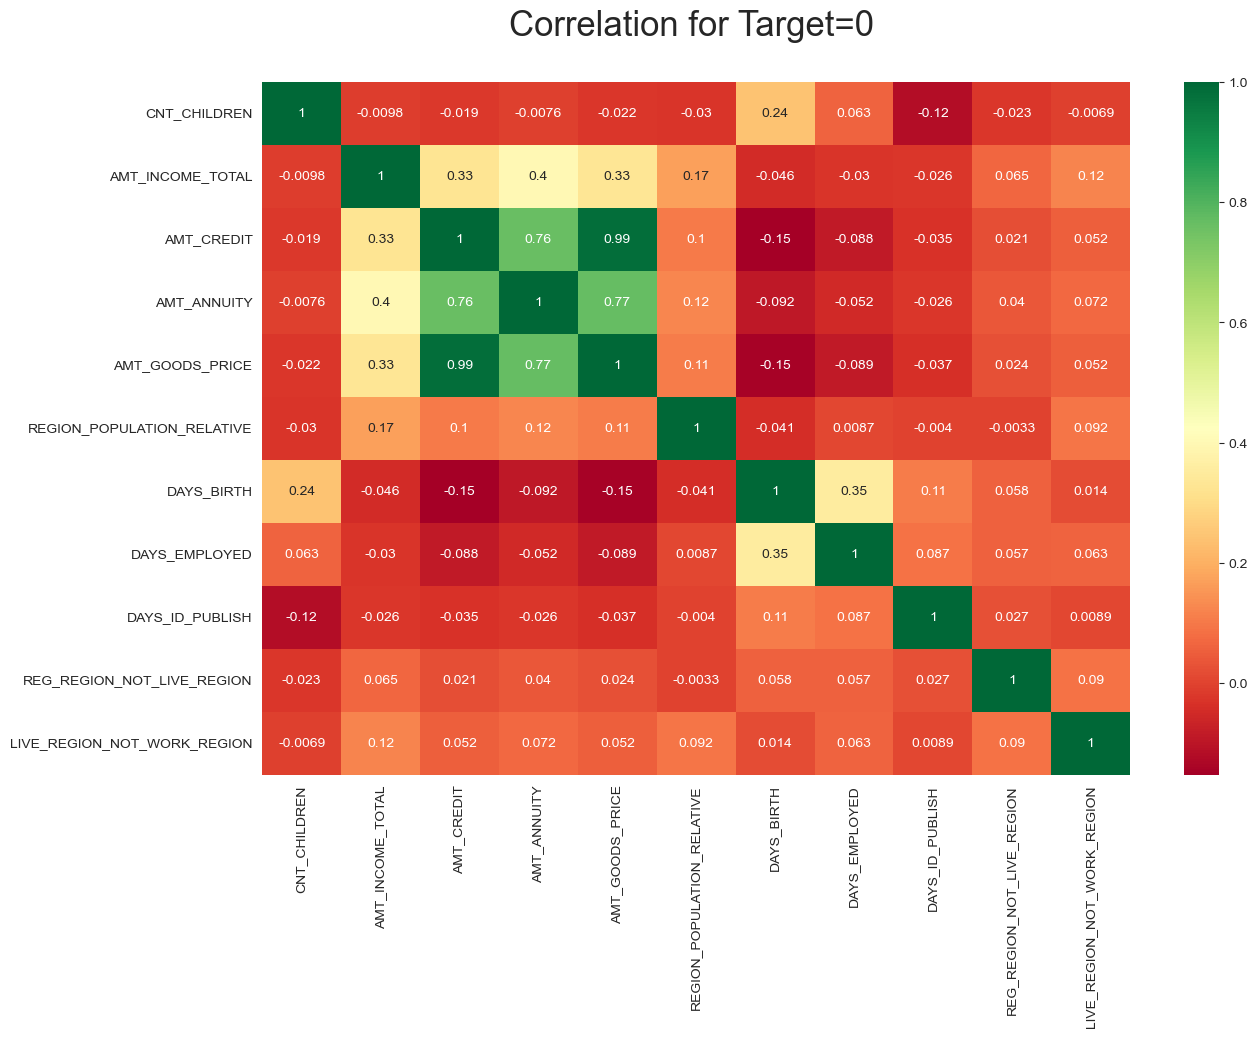

In [234]:
#Plotting the relationship and viewon heat map will give better insights
target_0_corr = target_0_num.iloc[:, :].corr()
plt.figure(figsize=[14,9])
sns.heatmap(target_0_corr, annot=True, cmap='RdYlGn')
plt.title('Correlation for Target=0 \n', fontsize=25)
plt.show()

1. There is a high correlation(+VE) between Credit_amount & Goods_Price.
2. As Credit amount increases Days_Birth decreases i.e credit amount of the loan is higher for low age applicants and vice versa
3. As Credit amount increases DAYS_EMPLOYEMENT decreases i.e credit amount of the loan is higher and DAYS_EMPLOYEMENT is less ,vice versa.
4. As Credit amount increases count of children is less and vice versa.
5. More income applicants have less children they will have.
6. More income less age and vice versa.

## Calculating the correlation among the target_1(with payment difficulties) people

In [237]:
target_1_num=target_1[["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_ID_PUBLISH","REG_REGION_NOT_LIVE_REGION","LIVE_REGION_NOT_WORK_REGION"]]

In [238]:
target_1_corr = target_1_num.iloc[:, :].corr()
target_1_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                         1.00              0.00       -0.00   
AMT_INCOME_TOTAL                     0.00              1.00        0.04   
AMT_CREDIT                          -0.00              0.04        1.00   
AMT_ANNUITY                          0.02              0.04        0.75   
AMT_GOODS_PRICE                     -0.01              0.04        0.98   
REGION_POPULATION_RELATIVE          -0.03              0.01        0.07   
DAYS_BIRTH                           0.18             -0.01       -0.19   
DAYS_EMPLOYED                        0.03             -0.00       -0.11   
DAYS_ID_PUBLISH                     -0.09             -0.01       -0.06   
REG_REGION_NOT_LIVE_REGION          -0.03              0.01        0.02   
LIVE_REGION_NOT_WORK_REGION         -0.03              0.01        0.04   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                        0.02            -0.01   
AMT_INCOME_TOTAL                    0.04             0.04   
AMT_CREDIT                          0.75             0.98   
AMT_ANNUITY                         1.00             0.75   
AMT_GOODS_PRICE                     0.75             1.00   
REGION_POPULATION_RELATIVE          0.07             0.08   
DAYS_BIRTH                         -0.09            -0.19   
DAYS_EMPLOYED                      -0.05            -0.11   
DAYS_ID_PUBLISH                    -0.04            -0.06   
REG_REGION_NOT_LIVE_REGION          0.03             0.02   
LIVE_REGION_NOT_WORK_REGION         0.06             0.04   

                             REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
CNT_CHILDREN                                      -0.03        0.18   
AMT_INCOME_TOTAL                                   0.01       -0.01   
AMT_CREDIT                                         0.07       -0.19   
AMT_ANNUITY                                        0.07       -0.09   
AMT_GOODS_PRICE                                    0.08       -0.19   
REGION_POPULATION_RELATIVE                         1.00       -0.05   
DAYS_BIRTH                                        -0.05        1.00   
DAYS_EMPLOYED                                     -0.02        0.31   
DAYS_ID_PUBLISH                                   -0.01        0.13   
REG_REGION_NOT_LIVE_REGION                        -0.02        0.04   
LIVE_REGION_NOT_WORK_REGION                        0.05        0.00   

                             DAYS_EMPLOYED  DAYS_ID_PUBLISH  \
CNT_CHILDREN                          0.03            -0.09   
AMT_INCOME_TOTAL                     -0.00            -0.01   
AMT_CREDIT                           -0.11            -0.06   
AMT_ANNUITY                          -0.05            -0.04   
AMT_GOODS_PRICE                      -0.11            -0.06   
REGION_POPULATION_RELATIVE           -0.02            -0.01   
DAYS_BIRTH                            0.31             0.13   
DAYS_EMPLOYED                         1.00             0.10   
DAYS_ID_PUBLISH                       0.10             1.00   
REG_REGION_NOT_LIVE_REGION            0.06             0.03   
LIVE_REGION_NOT_WORK_REGION           0.05             0.00   

                             REG_REGION_NOT_LIVE_REGION  \
CNT_CHILDREN                                      -0.03   
AMT_INCOME_TOTAL                                   0.01   
AMT_CREDIT                                         0.02   
AMT_ANNUITY                                        0.03   
AMT_GOODS_PRICE                                    0.02   
REGION_POPULATION_RELATIVE                        -0.02   
DAYS_BIRTH                                         0.04   
DAYS_EMPLOYED                                      0.06   
DAYS_ID_PUBLISH                                    0.03   
REG_REGION_NOT_LIVE_REGION                         1.00   
LIVE_REGION_NOT_WORK_REGION                        0.07   

                             LIVE_REGION_NOT_WORK_REGION  
CNT_CHILDREN     

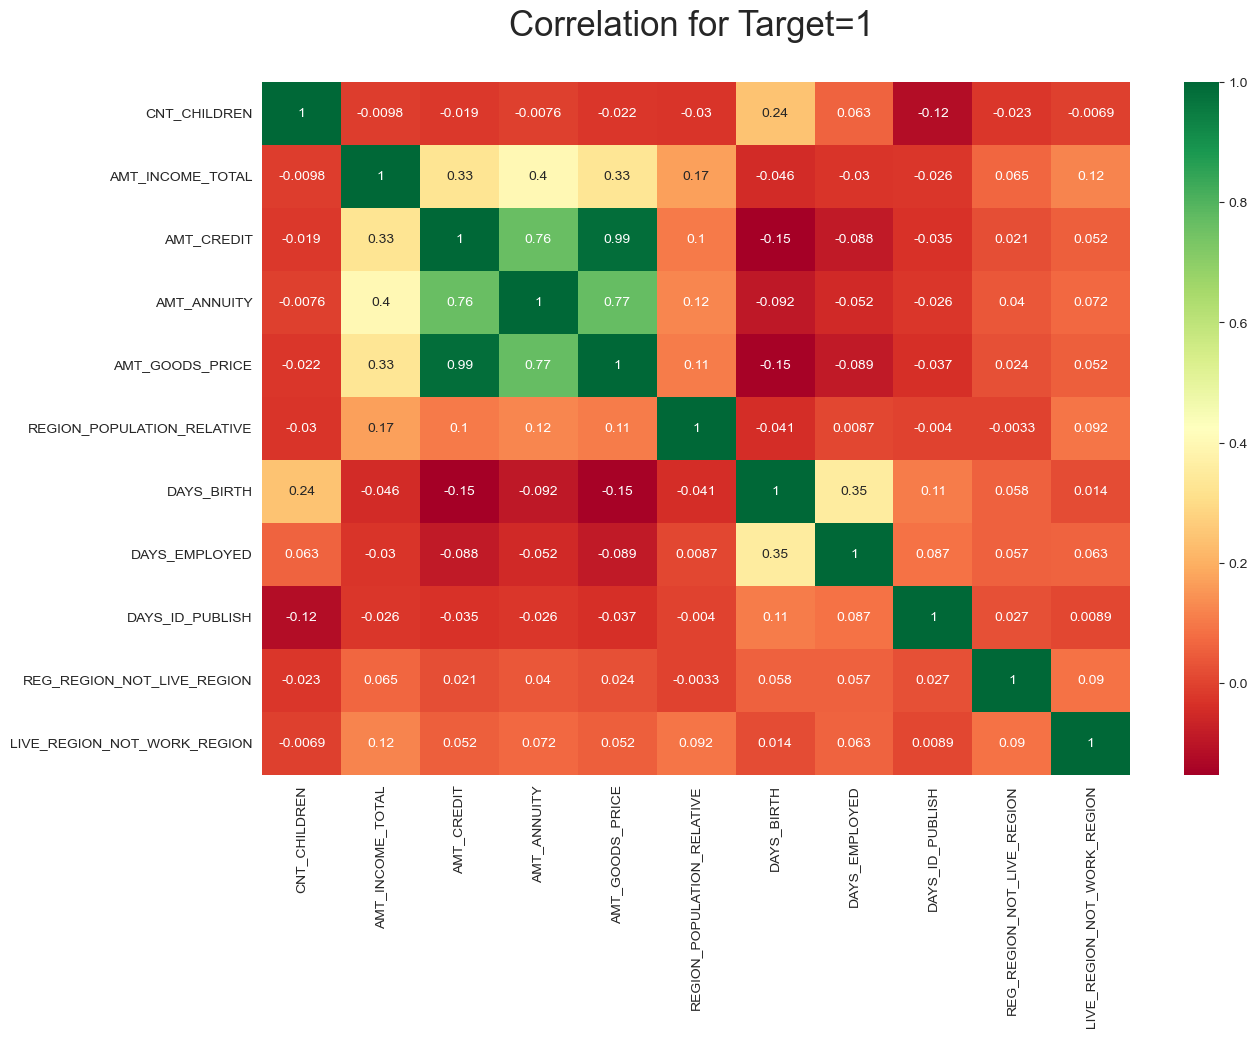

In [239]:
target_1_corr = target_1_num.iloc[:, :].corr()
plt.figure(figsize=[14,9])
sns.heatmap(target_0_corr, annot=True, cmap='RdYlGn')
plt.title('Correlation for Target=1 \n', fontsize=25)
plt.show()

Looks pretty similar as target_0 variable

## Bivariate Analysis For categorical and numerical variables(For Target variable 1)

#### Defaulters

In [243]:
num_columnss=["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_BIRTH"]

In [244]:
cat_columnss=["NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","ORGANIZATION_TYPE","AMT_CREDIT_RANGE"]

#### Considering AMT_CREDIT VARIABLE 

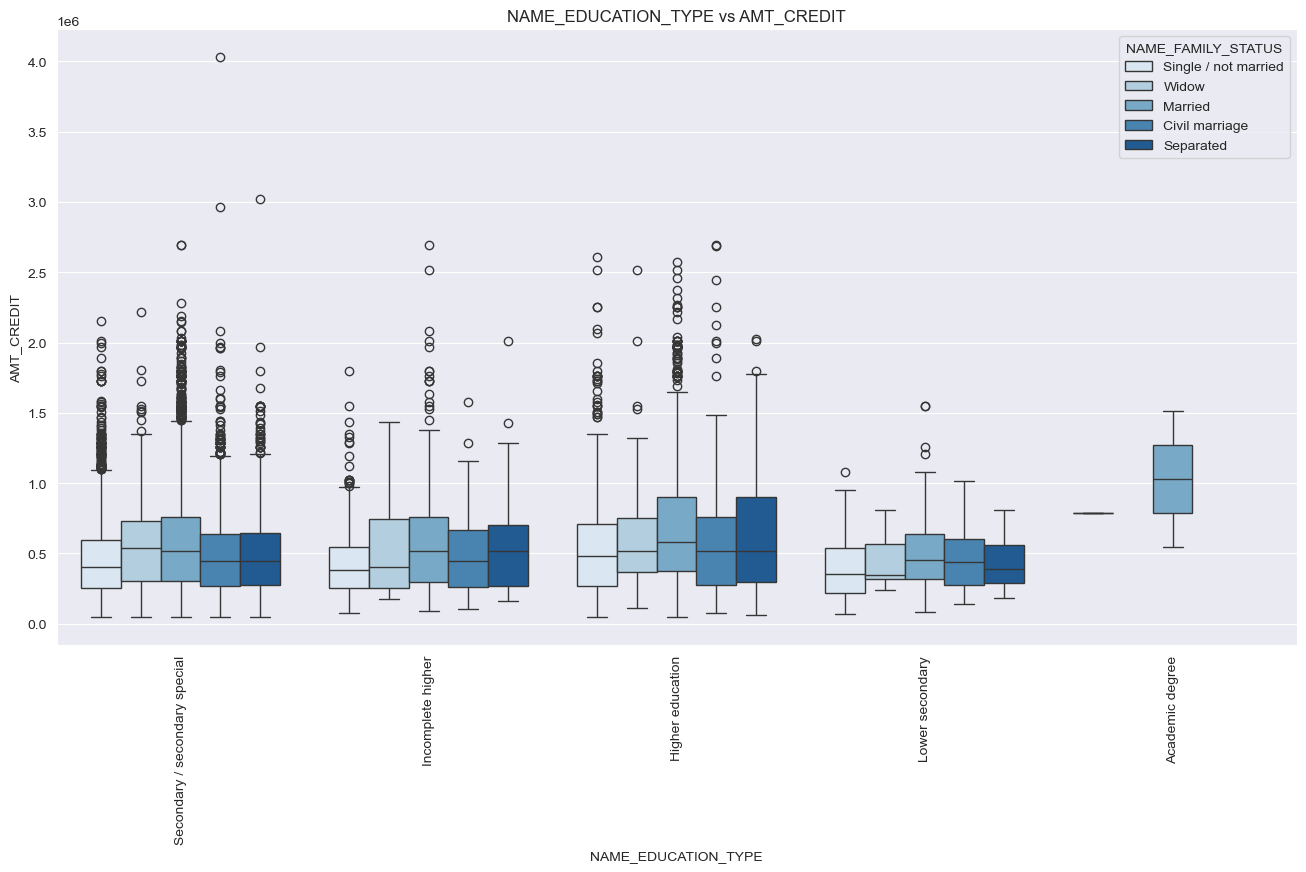

In [246]:
plt.figure(figsize=(16,8))
sns.boxplot(target_1,x="NAME_EDUCATION_TYPE",y="AMT_CREDIT",hue ='NAME_FAMILY_STATUS',palette="Blues")
plt.title("NAME_EDUCATION_TYPE vs AMT_CREDIT")
plt.xticks(rotation=90)
plt.show()

1. In Academic Degree Married has most number of credit amount of the loan(Defaulters)
2. Married,seperated and civil married applicants have more number of credits.
3. secondary special have more outliers in it

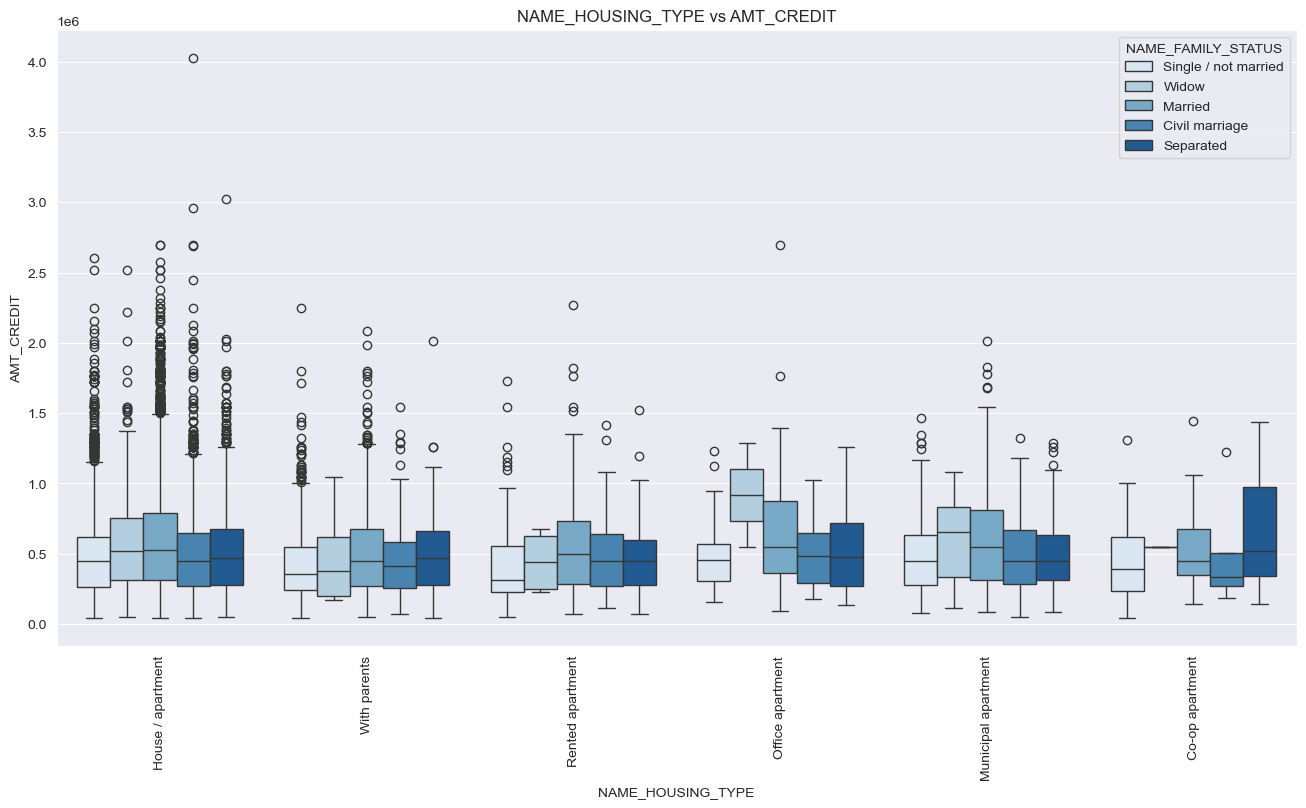

In [248]:
plt.figure(figsize=(16,8))
sns.boxplot(target_1,x="NAME_HOUSING_TYPE",y="AMT_CREDIT",hue ='NAME_FAMILY_STATUS',palette="Blues")
plt.title("NAME_HOUSING_TYPE vs AMT_CREDIT")
plt.xticks(rotation=90)
plt.show()

1. In Office appartment Widow has most number of credit amount of the loan
2. Married,seperated and civil married applicants have more number of credits.
3. House apartment have more outliers in it

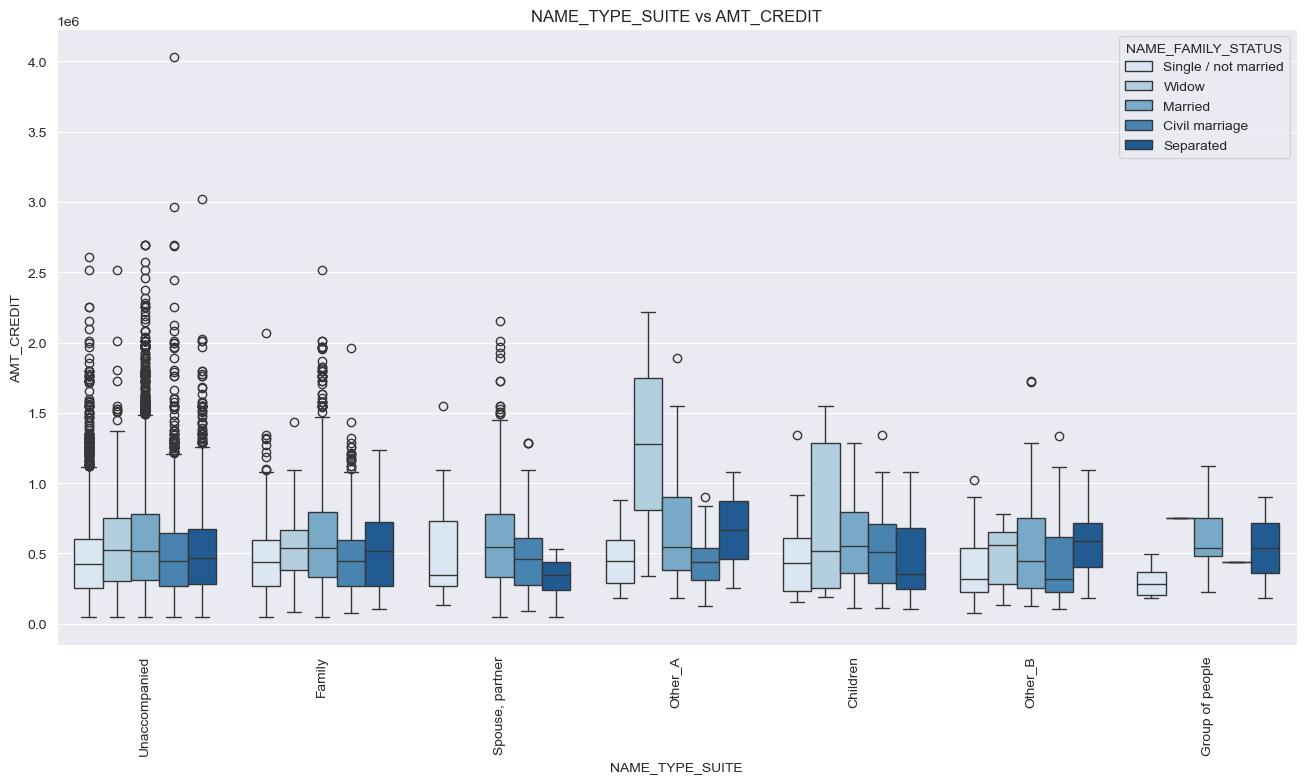

In [250]:
plt.figure(figsize=(16,8))
sns.boxplot(target_1,x="NAME_TYPE_SUITE",y="AMT_CREDIT",hue ='NAME_FAMILY_STATUS',palette="Blues")
plt.title("NAME_TYPE_SUITE vs AMT_CREDIT")
plt.xticks(rotation=90)
plt.show()

1. In Other_A Married has most number of credit amount of the loan
2. Married,seperated and civil married applicants have more number of credits.
3. Unaccompanied have more outliers in it


#### Considering AMT_ANNUITY VARIABLE 

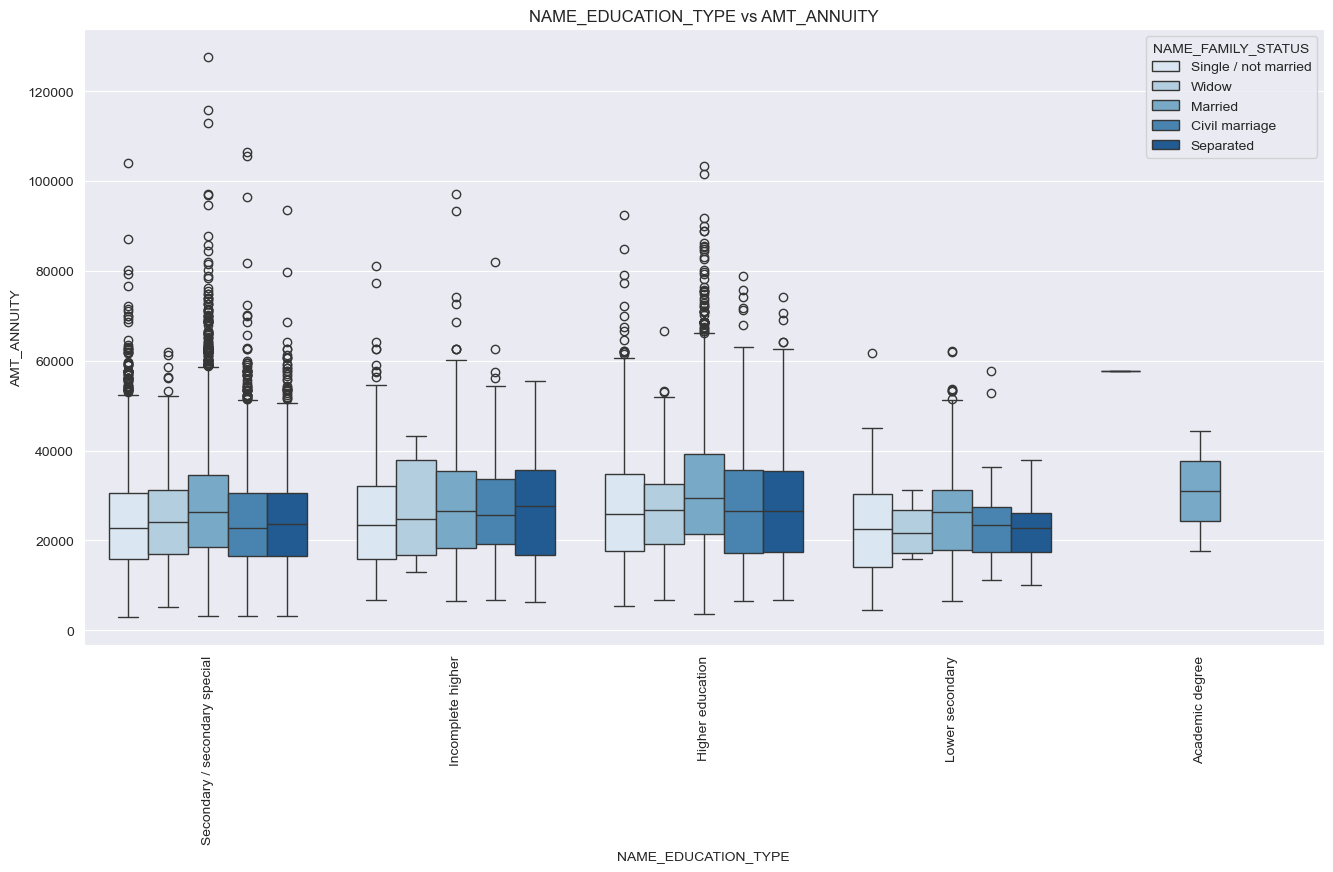

In [253]:
plt.figure(figsize=(16,8))
sns.boxplot(target_1,x="NAME_EDUCATION_TYPE",y="AMT_ANNUITY",hue ='NAME_FAMILY_STATUS',palette="Blues")
plt.title("NAME_EDUCATION_TYPE vs AMT_ANNUITY")
plt.xticks(rotation=90)
plt.show()

1. Loan annuity for Married, seperated and civil married applicants are higher as compare to others.
2. secondary special have more outliers in it.

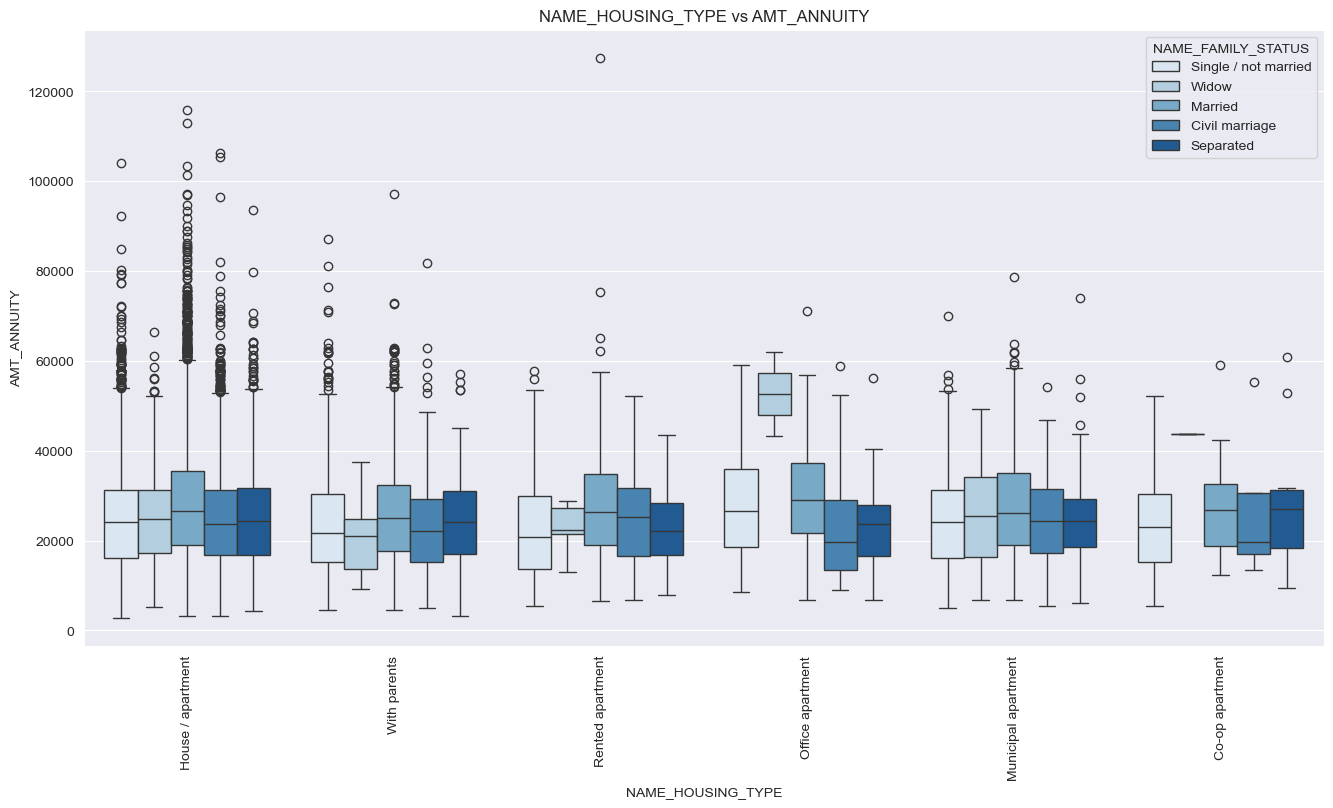

In [255]:
plt.figure(figsize=(16,8))
sns.boxplot(target_1,x="NAME_HOUSING_TYPE",y="AMT_ANNUITY",hue ='NAME_FAMILY_STATUS',palette="Blues")
plt.title("NAME_HOUSING_TYPE vs AMT_ANNUITY")
plt.xticks(rotation=90)
plt.show()

1. In office appartment Widow has highest Loan annuity as compare to others
2. Loan annuity for Married, seperated and civil married applicants are higher as compare to others.
3. House Apartment has more outliers in it.

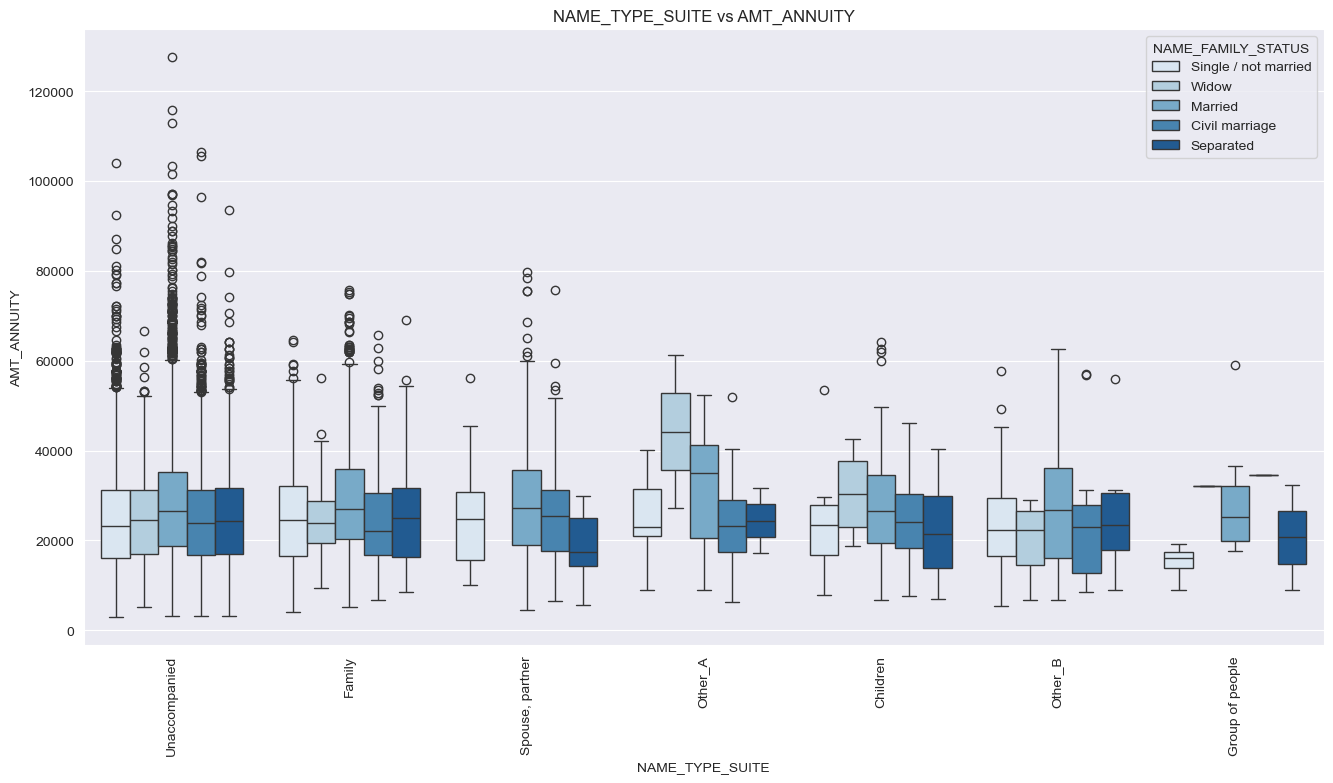

In [257]:
plt.figure(figsize=(16,8))
sns.boxplot(target_1,x="NAME_TYPE_SUITE",y="AMT_ANNUITY",hue ='NAME_FAMILY_STATUS',palette="Blues")
plt.title("NAME_TYPE_SUITE vs AMT_ANNUITY")
plt.xticks(rotation=90)
plt.show()

1. In other_A Widow has highest Loan annuity as compare to others
2. Loan annuity for Married, seperated and civil married applicants are higher as compare to others.
3. Unaccompanied has more outliers in it.

## Bivariate Analysis For categorical and numerical variables(For Target variable 0)

##### Considering AMT_CREDIT VARIABLE

#### Non Defaulters

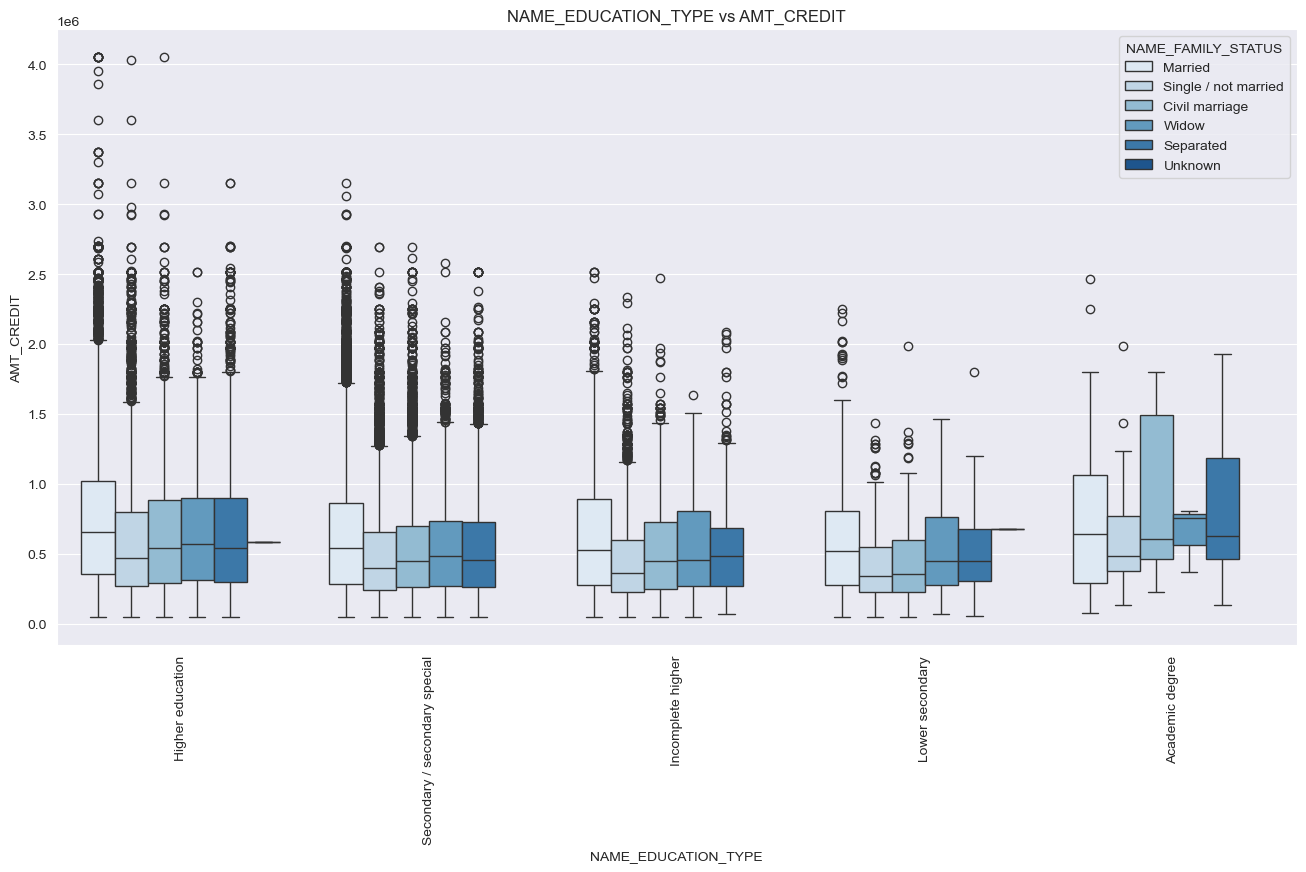

In [262]:
plt.figure(figsize=(16,8))
sns.boxplot(target_0,x="NAME_EDUCATION_TYPE",y="AMT_CREDIT",hue ='NAME_FAMILY_STATUS',palette="Blues")
plt.title("NAME_EDUCATION_TYPE vs AMT_CREDIT")
plt.xticks(rotation=90)
plt.show()

1. In Academic Degree Civil marriage has most number of credit amount of the loan
2. Married,seperated and civil married applicants have more number of credits.
3. higher education has more outliers in it

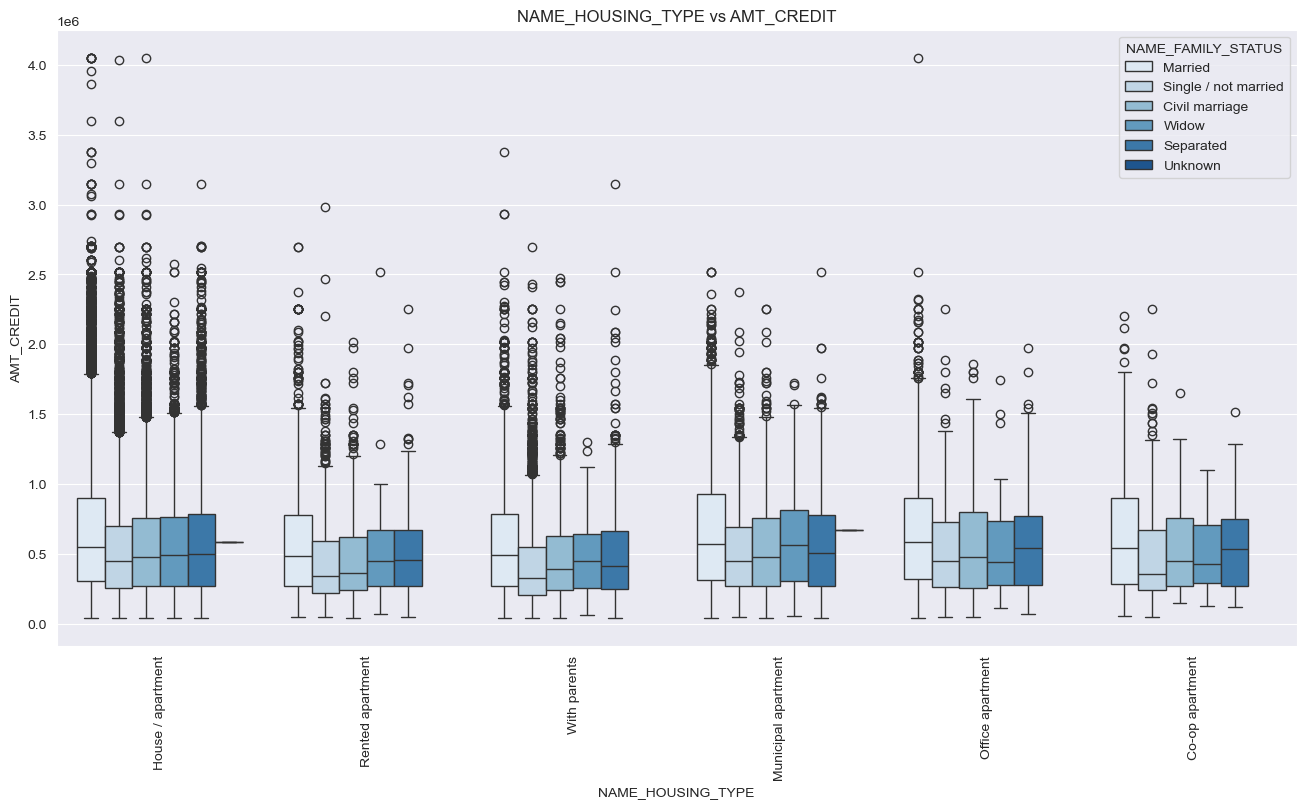

In [264]:
plt.figure(figsize=(16,8))
sns.boxplot(target_0,x="NAME_HOUSING_TYPE",y="AMT_CREDIT",hue ='NAME_FAMILY_STATUS',palette="Blues")
plt.title("NAME_HOUSING_TYPE vs AMT_CREDIT")
plt.xticks(rotation=90)
plt.show()

1. Married,seperated and civil married applicants have more number of credits.
2. House apartment have more outliers in it

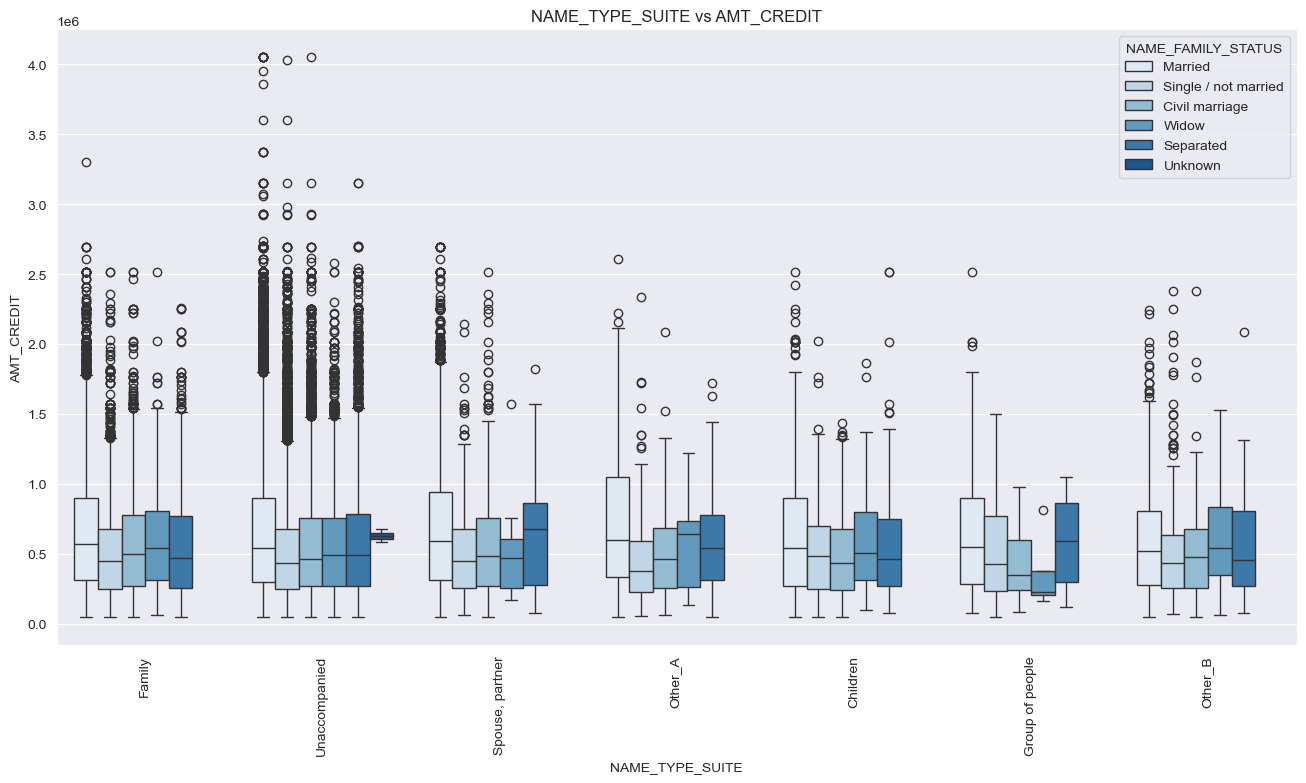

In [266]:
plt.figure(figsize=(16,8))
sns.boxplot(target_0,x="NAME_TYPE_SUITE",y="AMT_CREDIT",hue ='NAME_FAMILY_STATUS',palette="Blues")
plt.title("NAME_TYPE_SUITE vs AMT_CREDIT")
plt.xticks(rotation=90)
plt.show()

1. In Other_A Married has most number of credit amount of the loan
2. Married,seperated and civil married applicants have more number of credits.
3. Unaccompanied have more outliers in it

#### Considering AMT_ANNUITY VARIABLE

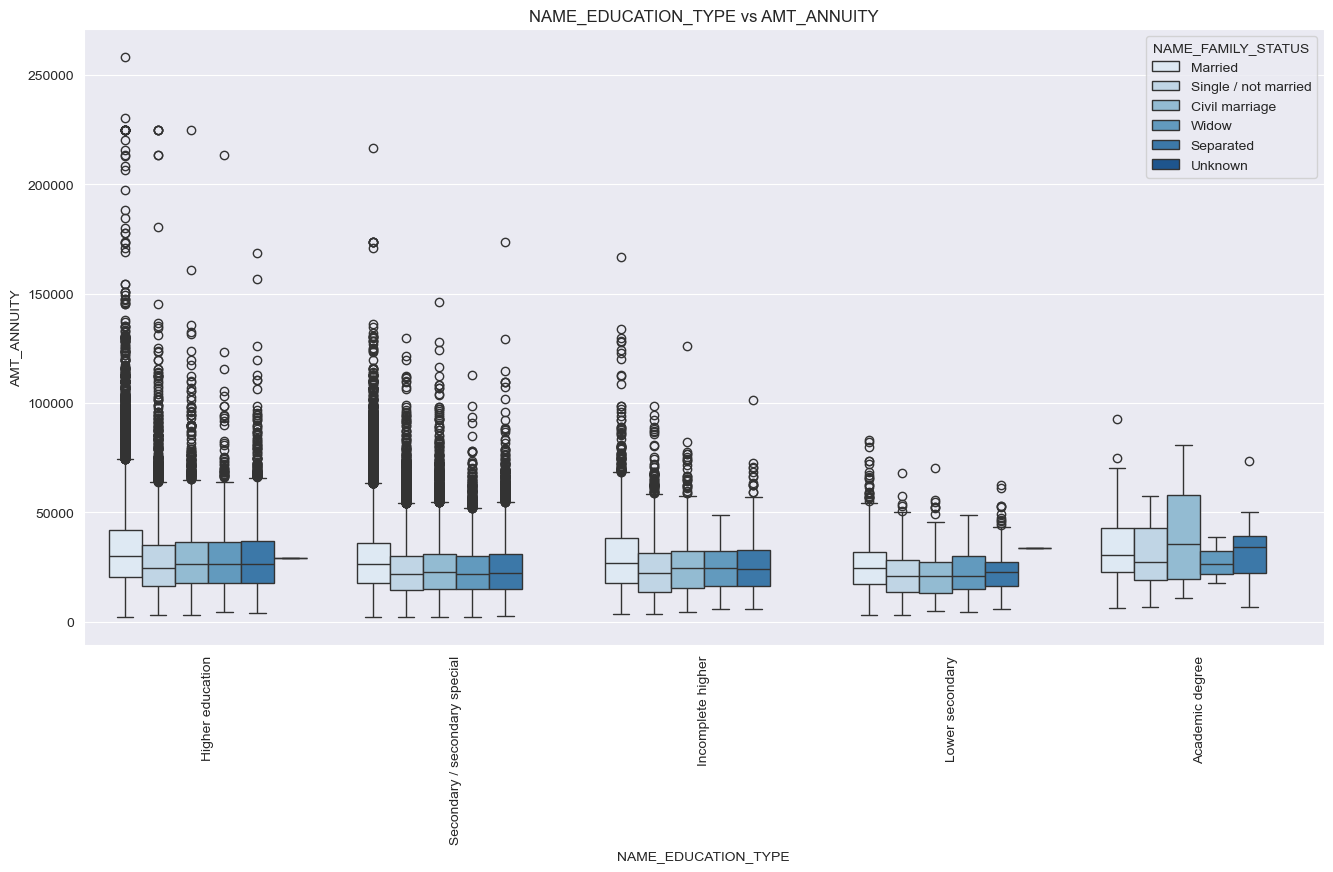

In [269]:
plt.figure(figsize=(16,8))
sns.boxplot(target_0,x="NAME_EDUCATION_TYPE",y="AMT_ANNUITY",hue ='NAME_FAMILY_STATUS',palette="Blues")
plt.title("NAME_EDUCATION_TYPE vs AMT_ANNUITY")
plt.xticks(rotation=90)
plt.show()

1. Loan annuity for Civil marriage is highest.
2. Loan annuity for Married, seperated and civil married applicants are higher as compare to others.
3. Higher education have more outliers in it.

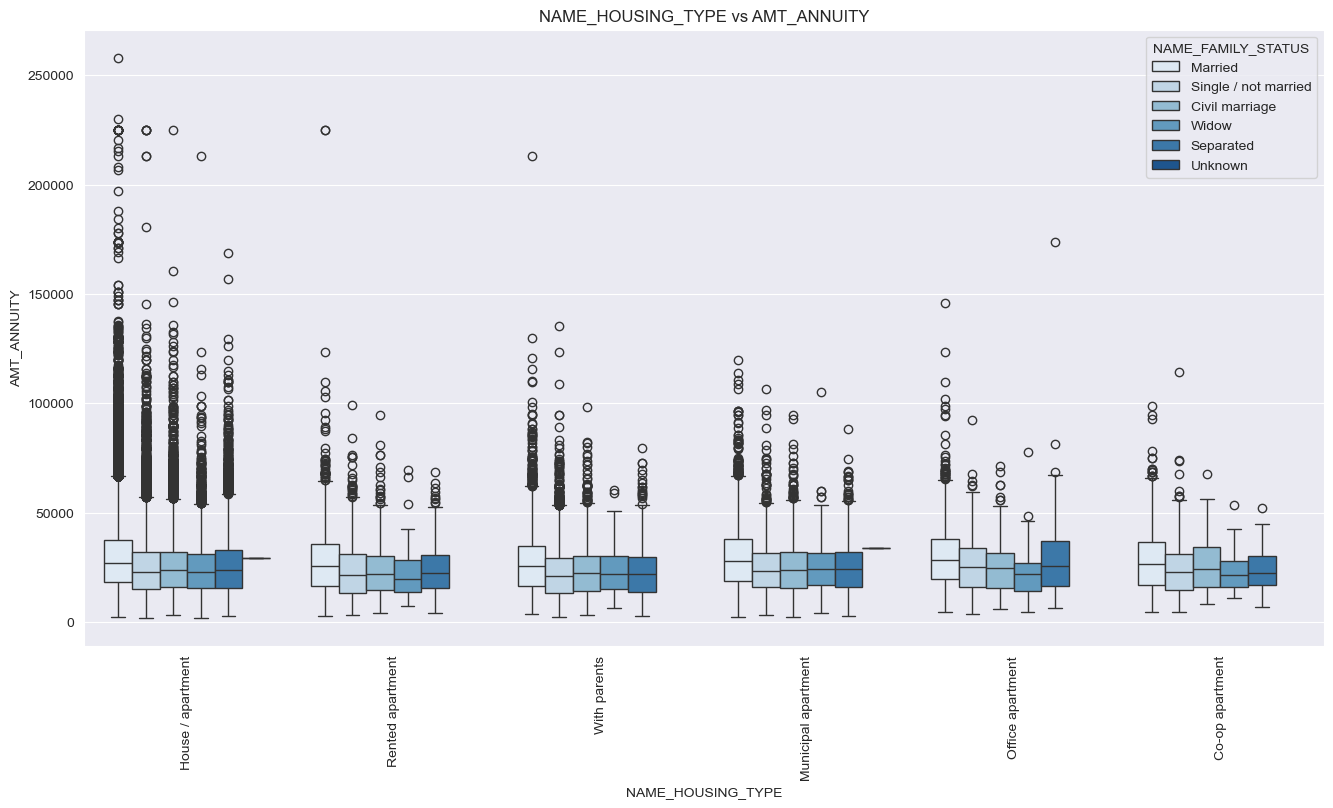

In [271]:
plt.figure(figsize=(16,8))
sns.boxplot(target_0,x="NAME_HOUSING_TYPE",y="AMT_ANNUITY",hue ='NAME_FAMILY_STATUS',palette="Blues")
plt.title("NAME_HOUSING_TYPE vs AMT_ANNUITY")
plt.xticks(rotation=90)
plt.show()

1. Loan annuity for Married, seperated and civil married applicants are higher as compare to others.
2. House Apartment has more outliers in it.

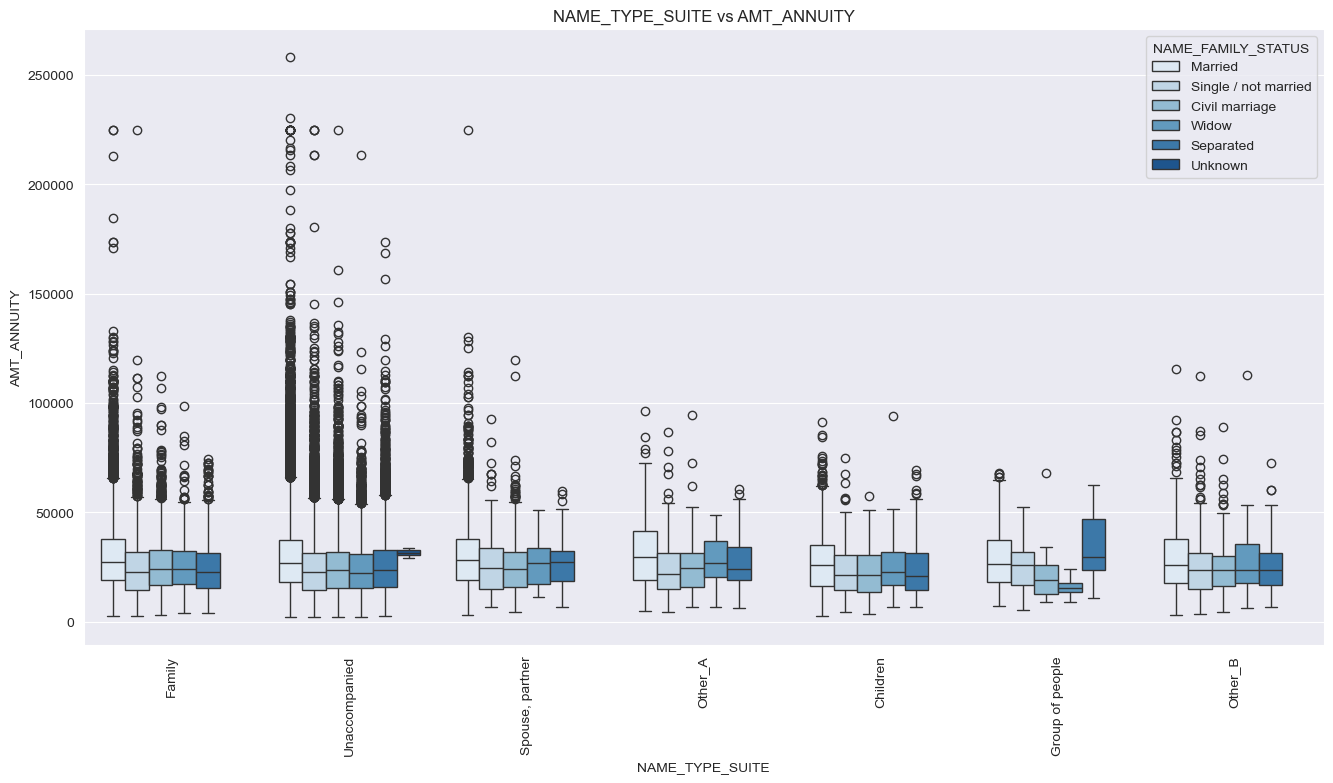

In [273]:
plt.figure(figsize=(16,8))
sns.boxplot(target_0,x="NAME_TYPE_SUITE",y="AMT_ANNUITY",hue ='NAME_FAMILY_STATUS',palette="Blues")
plt.title("NAME_TYPE_SUITE vs AMT_ANNUITY")
plt.xticks(rotation=90)
plt.show()

1. In Group of people Unknown has highest Loan annuity as compare to others
2. Loan annuity for Married, seperated and civil married applicants are higher as compare to others.
3. Unaccompanied has more outliers in it.

## Now using Previous_Application Data

In [276]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans        17,145.00   17,145.00   
1     2802425      108129         Cash loans       607,500.00  679,671.00   
2     2523466      122040         Cash loans       112,500.00  136,444.50   
3     2819243      176158         Cash loans       450,000.00  470,790.00   
4     1784265      202054         Cash loans       337,500.00  404,055.00   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   SATURDAY                       15   
1                   THURSDAY                       11   
2                    TUESDAY                       11   
3                     MONDAY                        7   
4                   THURSDAY                        9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE  \
0                           Y                       1                    XAP   
1                           Y                       1                    XNA   
2                           Y                       1                    XNA   
3                           Y                       1                    XNA   
4                           Y                       1                Repairs   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved            -73  Cash through the bank   
1             Approved           -164                    XNA   
2             Approved           -301  Cash through the bank   
3             Approved           -512  Cash through the bank   
4              Refused           -781  Cash through the bank   

  CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0                XAP         Repeater              Mobile            POS   
1                XAP         Repeater                 XNA           Cash   
2                XAP         Repeater                 XNA           Cash   
3                XAP         Repeater                 XNA           Cash   
4                 HC         Repeater                 XNA           Cash   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0               XNA             Country-wide                35   
1            x-sell           Contact center                -1   
2            x-sell  Credit and cash offices                -1   
3            x-sell  Credit and cash offices                -1   
4           walk-in  Credit and cash offices                -1   

  NAME_SELLER_INDUSTRY NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         Connectivity           middle  POS mobile with interest  
1                  XNA       low_action          Cash X-Sell: low  
2                  XNA             high         Cash X-Sell: high  
3                  XNA           middle       Cash X-Sell: middle  
4                  XNA             high         Cash Street: high

In [277]:
previous_application.shape

(1670214, 23)

## Merging 2 data frames

In [452]:
app_data_new=pd.merge(left=application_data,right=previous_application,how='inner',on='SK_ID_CURR')

In [454]:
app_data_new.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  CNT_CHILDREN  \
0      100002       1           Cash loans           M             0   
1      100003       0           Cash loans           F             0   
2      100003       0           Cash loans           F             0   
3      100003       0           Cash loans           F             0   
4      100004       0      Revolving loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY  AMT_GOODS_PRICE  \
0        202,500.00    406,597.50    24,700.50       351,000.00   
1        270,000.00  1,293,502.50    35,698.50     1,129,500.00   
2        270,000.00  1,293,502.50    35,698.50     1,129,500.00   
3        270,000.00  1,293,502.50    35,698.50     1,129,500.00   
4         67,500.00    135,000.00     6,750.00       135,000.00   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2          Family    State servant               Higher education   
3          Family    State servant               Higher education   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                        0.02   
1               Married  House / apartment                        0.00   
2               Married  House / apartment                        0.00   
3               Married  House / apartment                        0.00   
4  Single / not married  House / apartment                        0.01   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0         -25           -637              -3648            -2120   
1         -45          -1188              -1186             -291   
2         -45          -1188              -1186             -291   
3         -45          -1188              -1186             -291   
4         -52           -225              -4260            -2531   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                1                     2                            2   
1                2                     1                            1   
2                2                     1                            1   
3                2                     1                            1   
4                1                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0              

In [456]:
app_data_new.shape

(1140054, 68)

In [463]:
app_data_new.drop(['SK_ID_CURR','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [476]:
app_data_new=app_data_new.drop(app_data_new.loc[app_data_new["NAME_CASH_LOAN_PURPOSE"]=="XNA"].index)

In [478]:
app_data_new=app_data_new.drop(app_data_new.loc[app_data_new["NAME_CASH_LOAN_PURPOSE"]=="XAP"].index)

# Univariate Analysis

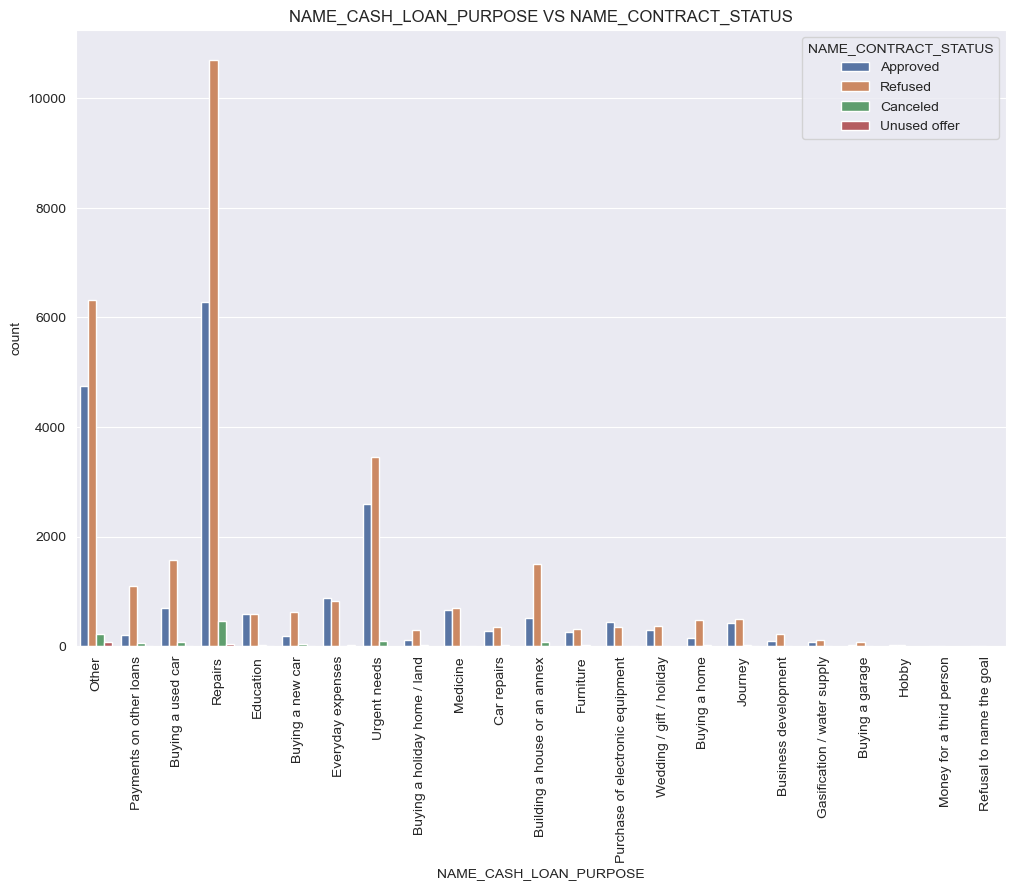

In [489]:
plt.figure(figsize=(12,8))
sns.countplot(app_data_new,x="NAME_CASH_LOAN_PURPOSE",palette="deep",hue="NAME_CONTRACT_STATUS")
plt.title("NAME_CASH_LOAN_PURPOSE VS NAME_CONTRACT_STATUS")
plt.xticks(rotation=90)
plt.show()

1. Maximum number of approvels and disapprovels came from Repair category
2. Buying a used or new car has disapprovels more then approvels
3. Urgent needs has almost equal number of approvels and disapprovels.

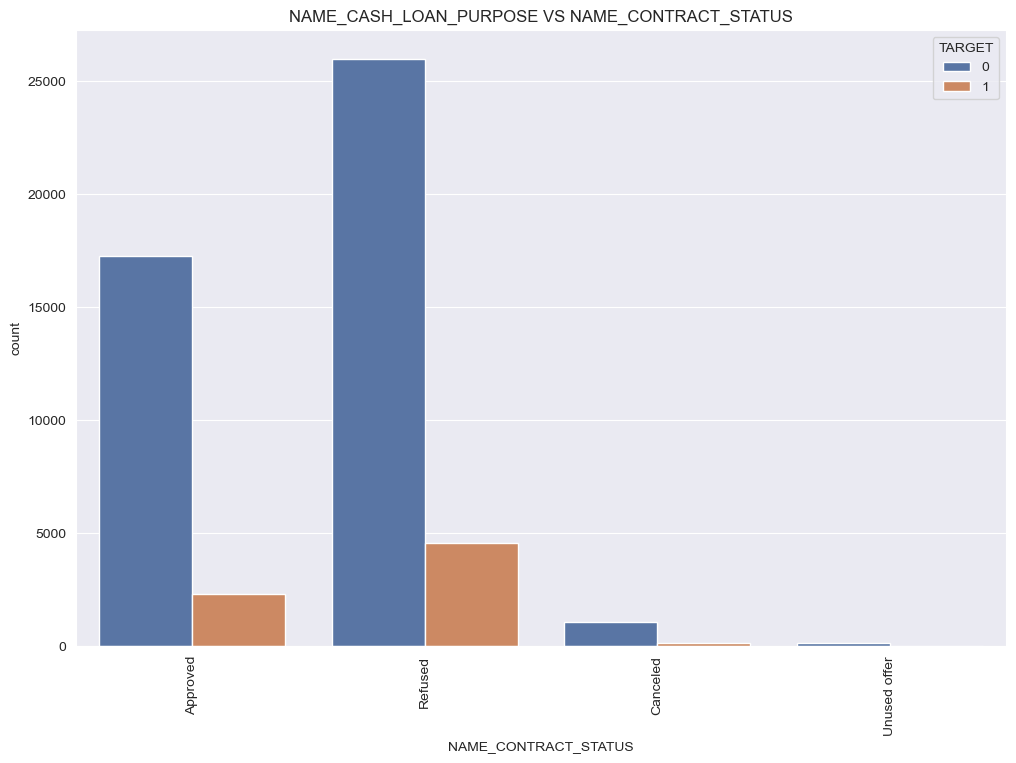

In [496]:
plt.figure(figsize=(12,8))
sns.countplot(app_data_new,x="NAME_CONTRACT_STATUS",palette="deep",hue="TARGET")
plt.title("NAME_CASH_LOAN_PURPOSE VS NAME_CONTRACT_STATUS")
plt.xticks(rotation=90)
plt.show()

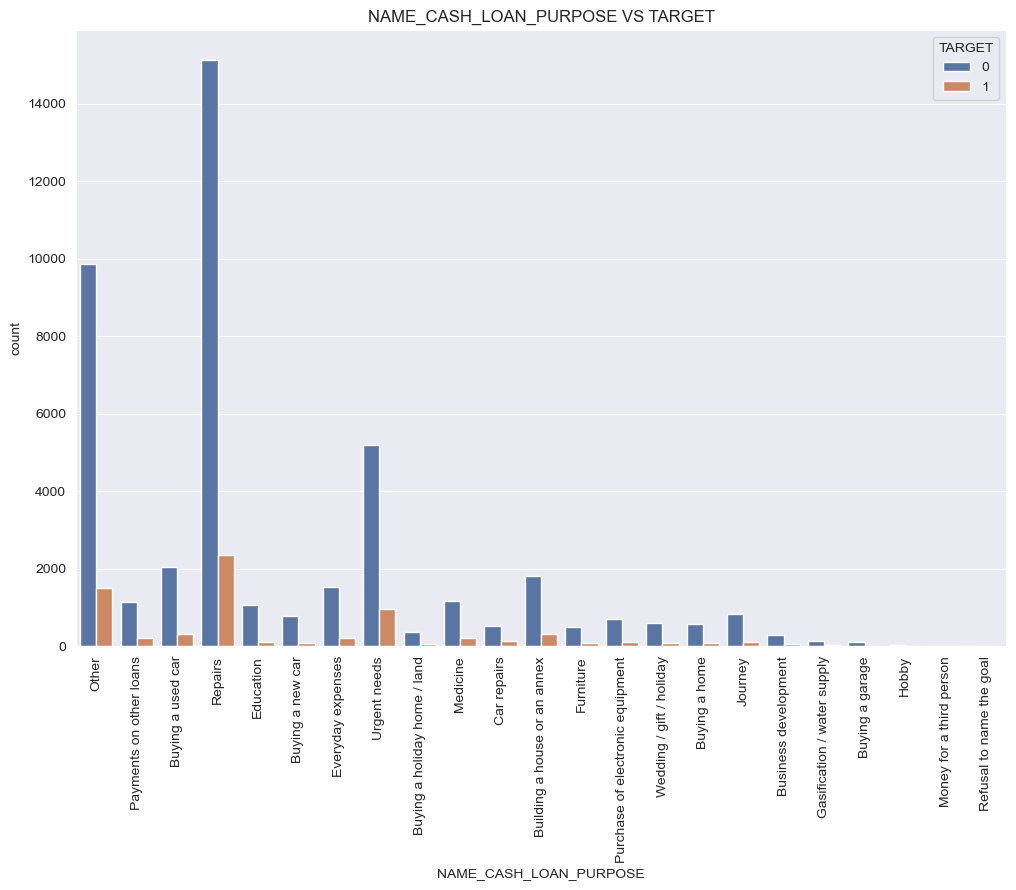

In [501]:
plt.figure(figsize=(12,8))
sns.countplot(app_data_new,x="NAME_CASH_LOAN_PURPOSE",palette="deep",hue="TARGET")
plt.title("NAME_CASH_LOAN_PURPOSE VS TARGET")
plt.xticks(rotation=90)
plt.show()

There is difficulty in repaying the loan on time for Repairs, other and Urgent needs category .

## Bivariate Analysis Of Combined data

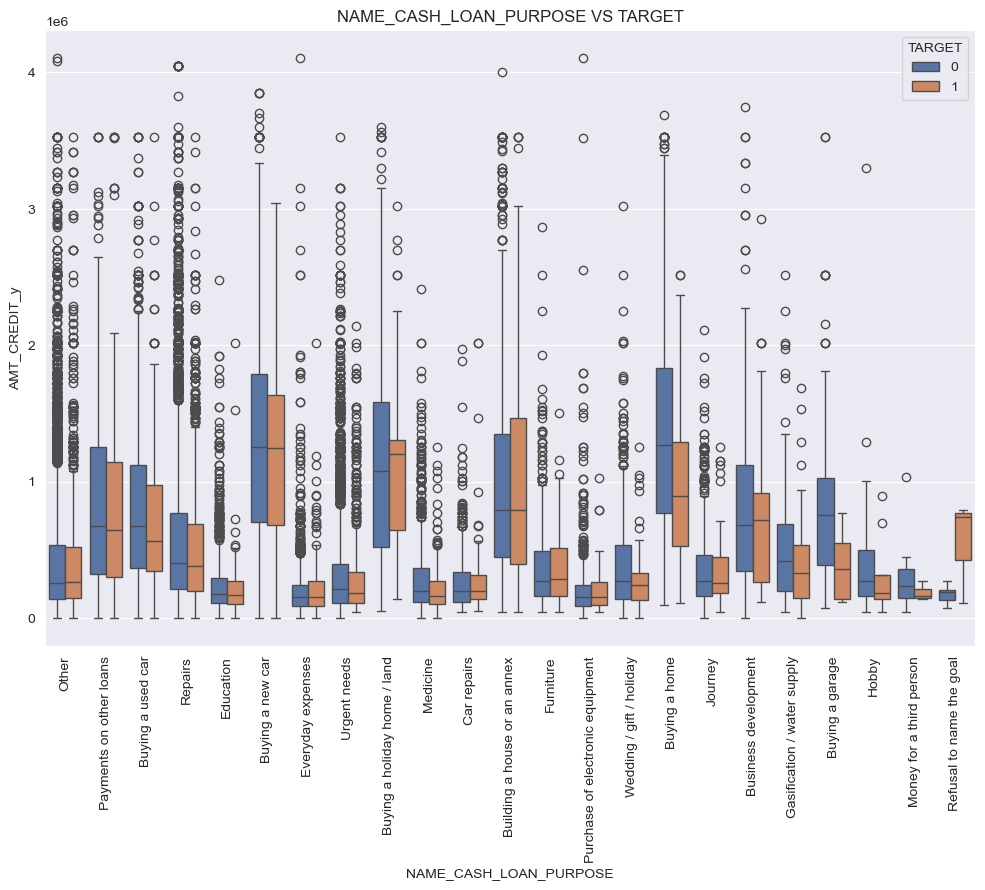

In [506]:
plt.figure(figsize=(12,8))
sns.boxplot(app_data_new,x="NAME_CASH_LOAN_PURPOSE",y='AMT_CREDIT_y',palette="deep",hue="TARGET")
plt.title("NAME_CASH_LOAN_PURPOSE VS TARGET")
plt.xticks(rotation=90)
plt.show()

Applicants Buying a new car,Buying a holiday home,Building a house,Buying a home,business development are not paying loans on time(Defaulters).

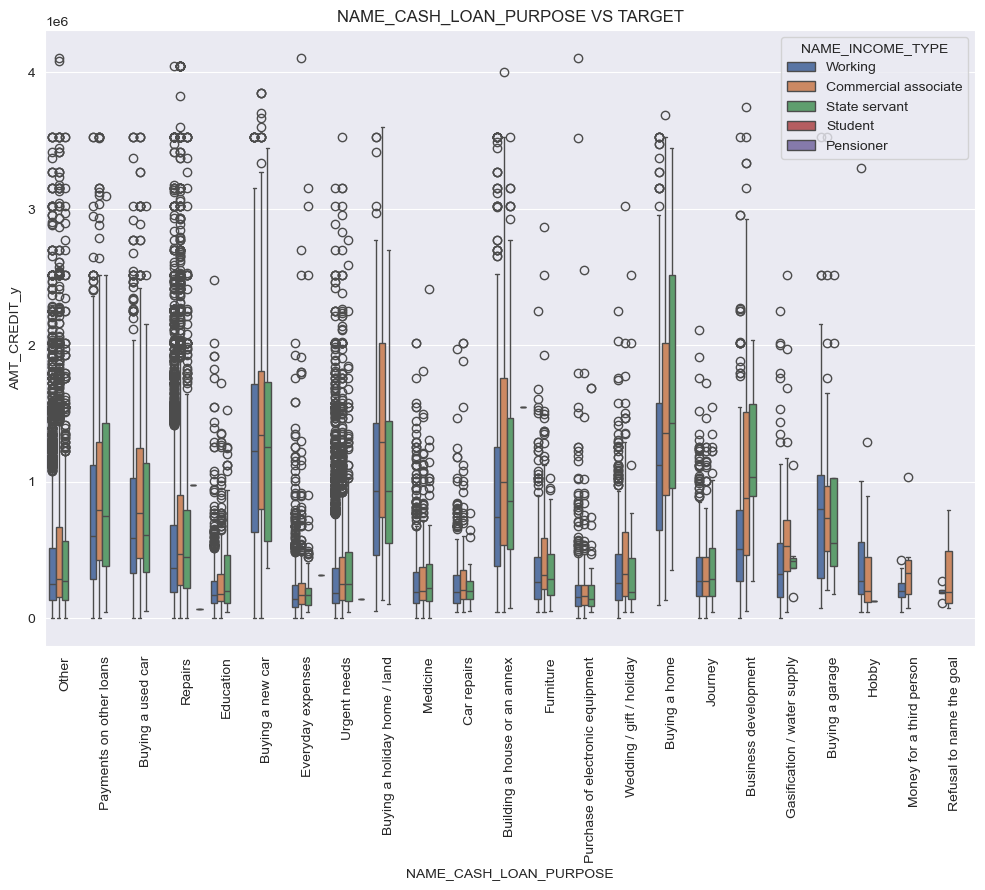

In [509]:
plt.figure(figsize=(12,8))
sns.boxplot(app_data_new,x="NAME_CASH_LOAN_PURPOSE",y='AMT_CREDIT_y',palette="deep",hue="NAME_INCOME_TYPE")
plt.title("NAME_CASH_LOAN_PURPOSE VS TARGET")
plt.xticks(rotation=90)
plt.show()